# Memorial de Cálculos e Códigos

## Determinação da função de transferência

In [1]:
from control.matlab import *
from control import pzmap
import matplotlib.pyplot as plt

fig = plt.figure(num=None, figsize=(10,7), dpi=300, facecolor='w', edgecolor='k')
func = tf([25.548],[7.2526*(10**4), 1.1362*(10**3), 1]) #Função de Transferência
print("Função de Transferência:")
print(func)
feedback_func = feedback(func) #Realimentação
print("Realimentação:")
print(feedback_func)

Função de Transferência:

          25.55
--------------------------
7.253e+04 s^2 + 1136 s + 1

Realimentação:

            25.55
------------------------------
7.253e+04 s^2 + 1136 s + 26.55



<Figure size 3000x2100 with 0 Axes>

## Gráficos da resposta ao degrau em malha aberta e fechada, diagrama de polos e zeros e diagrama de bode

Reposta ao degrau em malha aberta:


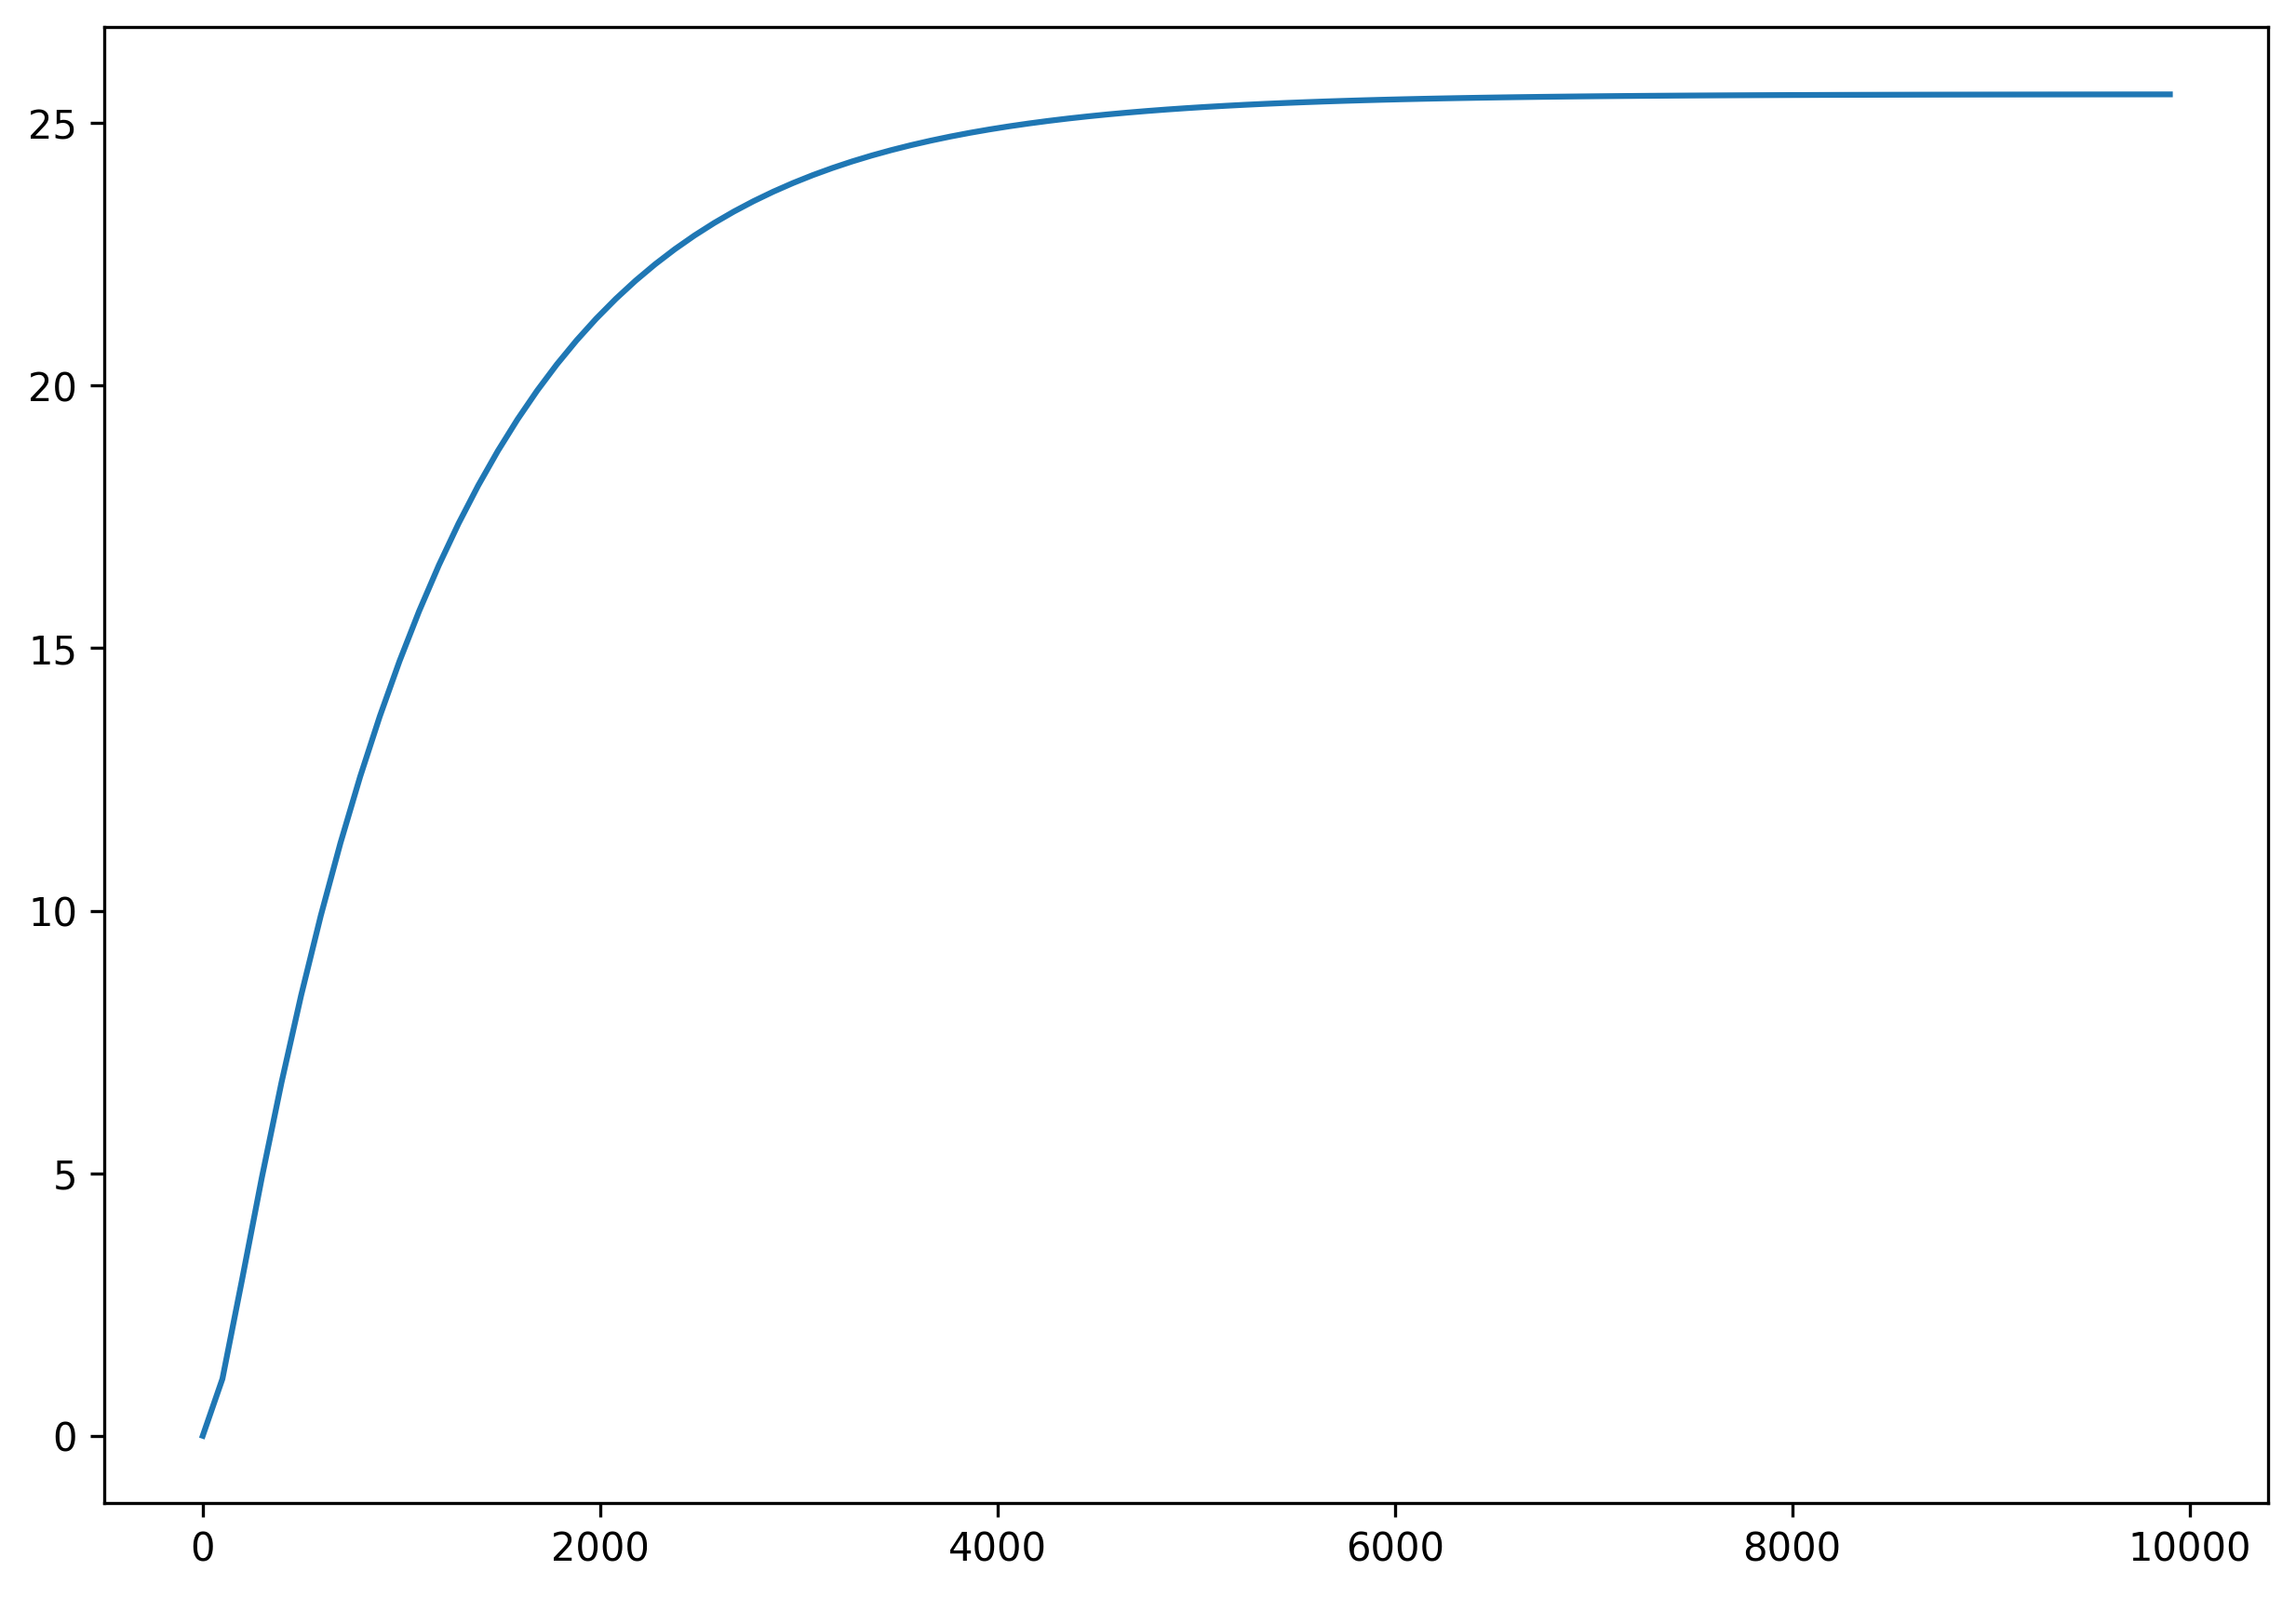

Polos:
-0.014730049433860259
-0.0009360565143514166

-------------------

Zeros:

-------------------



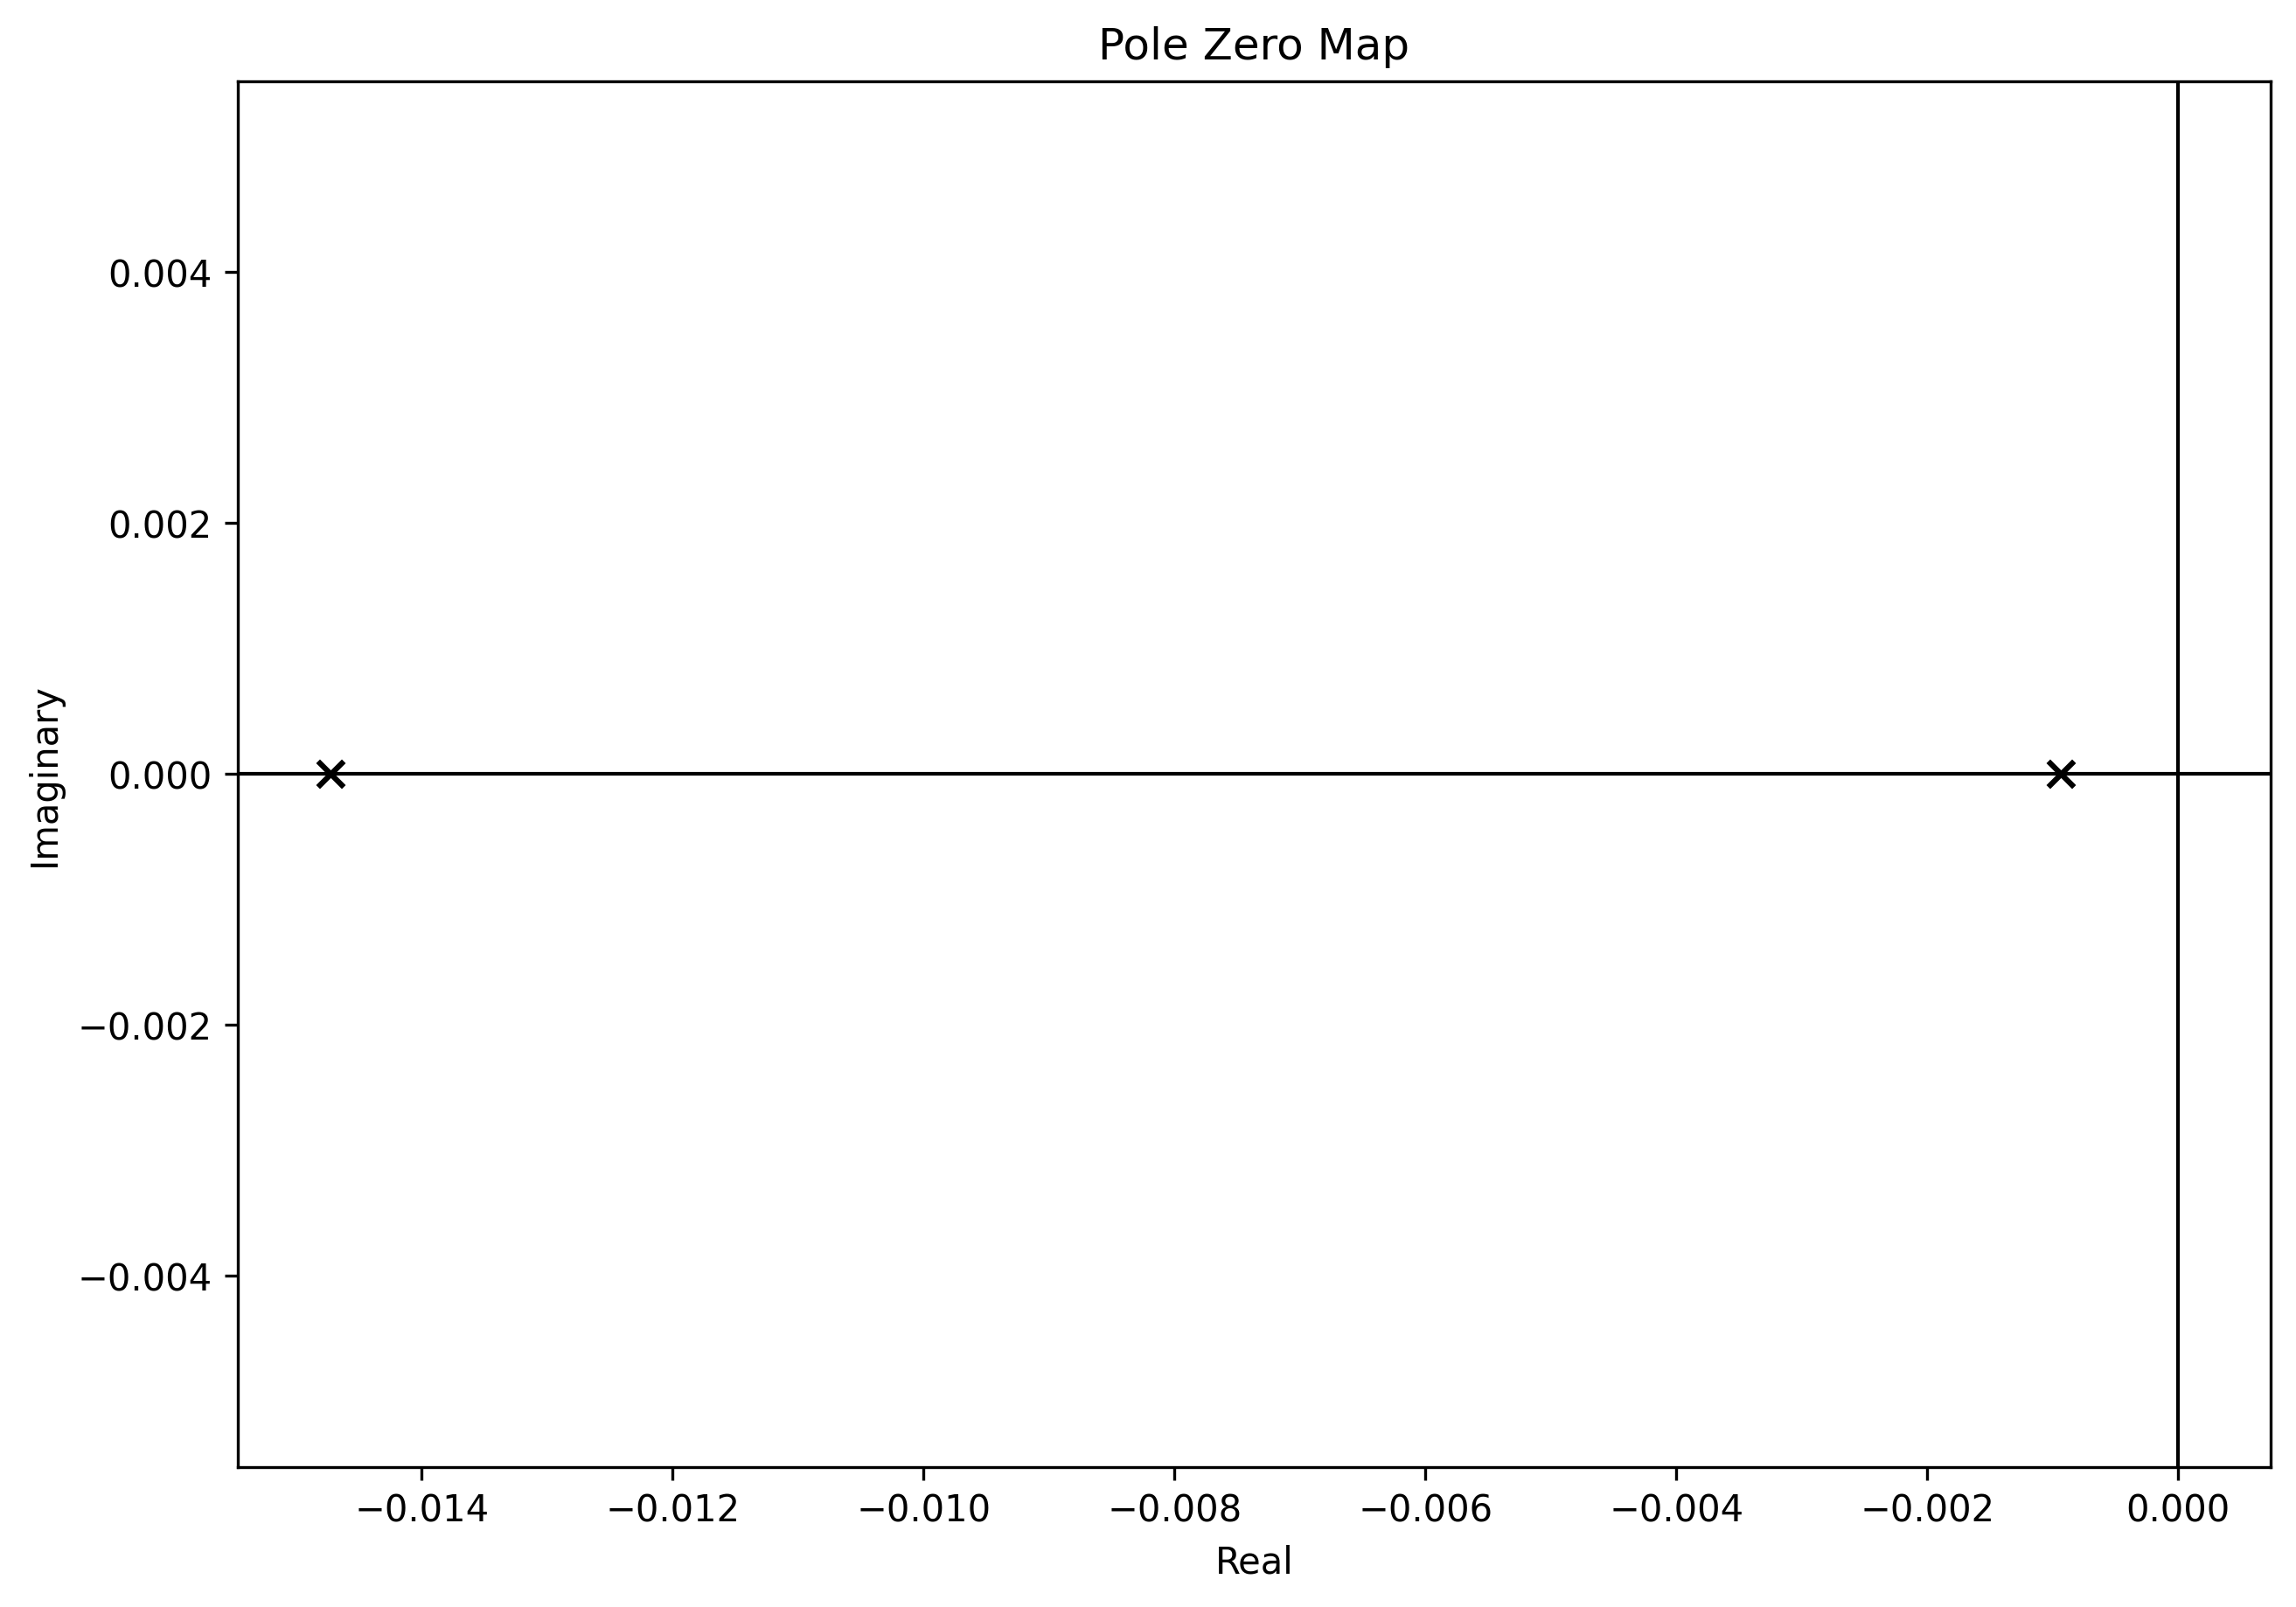

Diagrama de Bode:


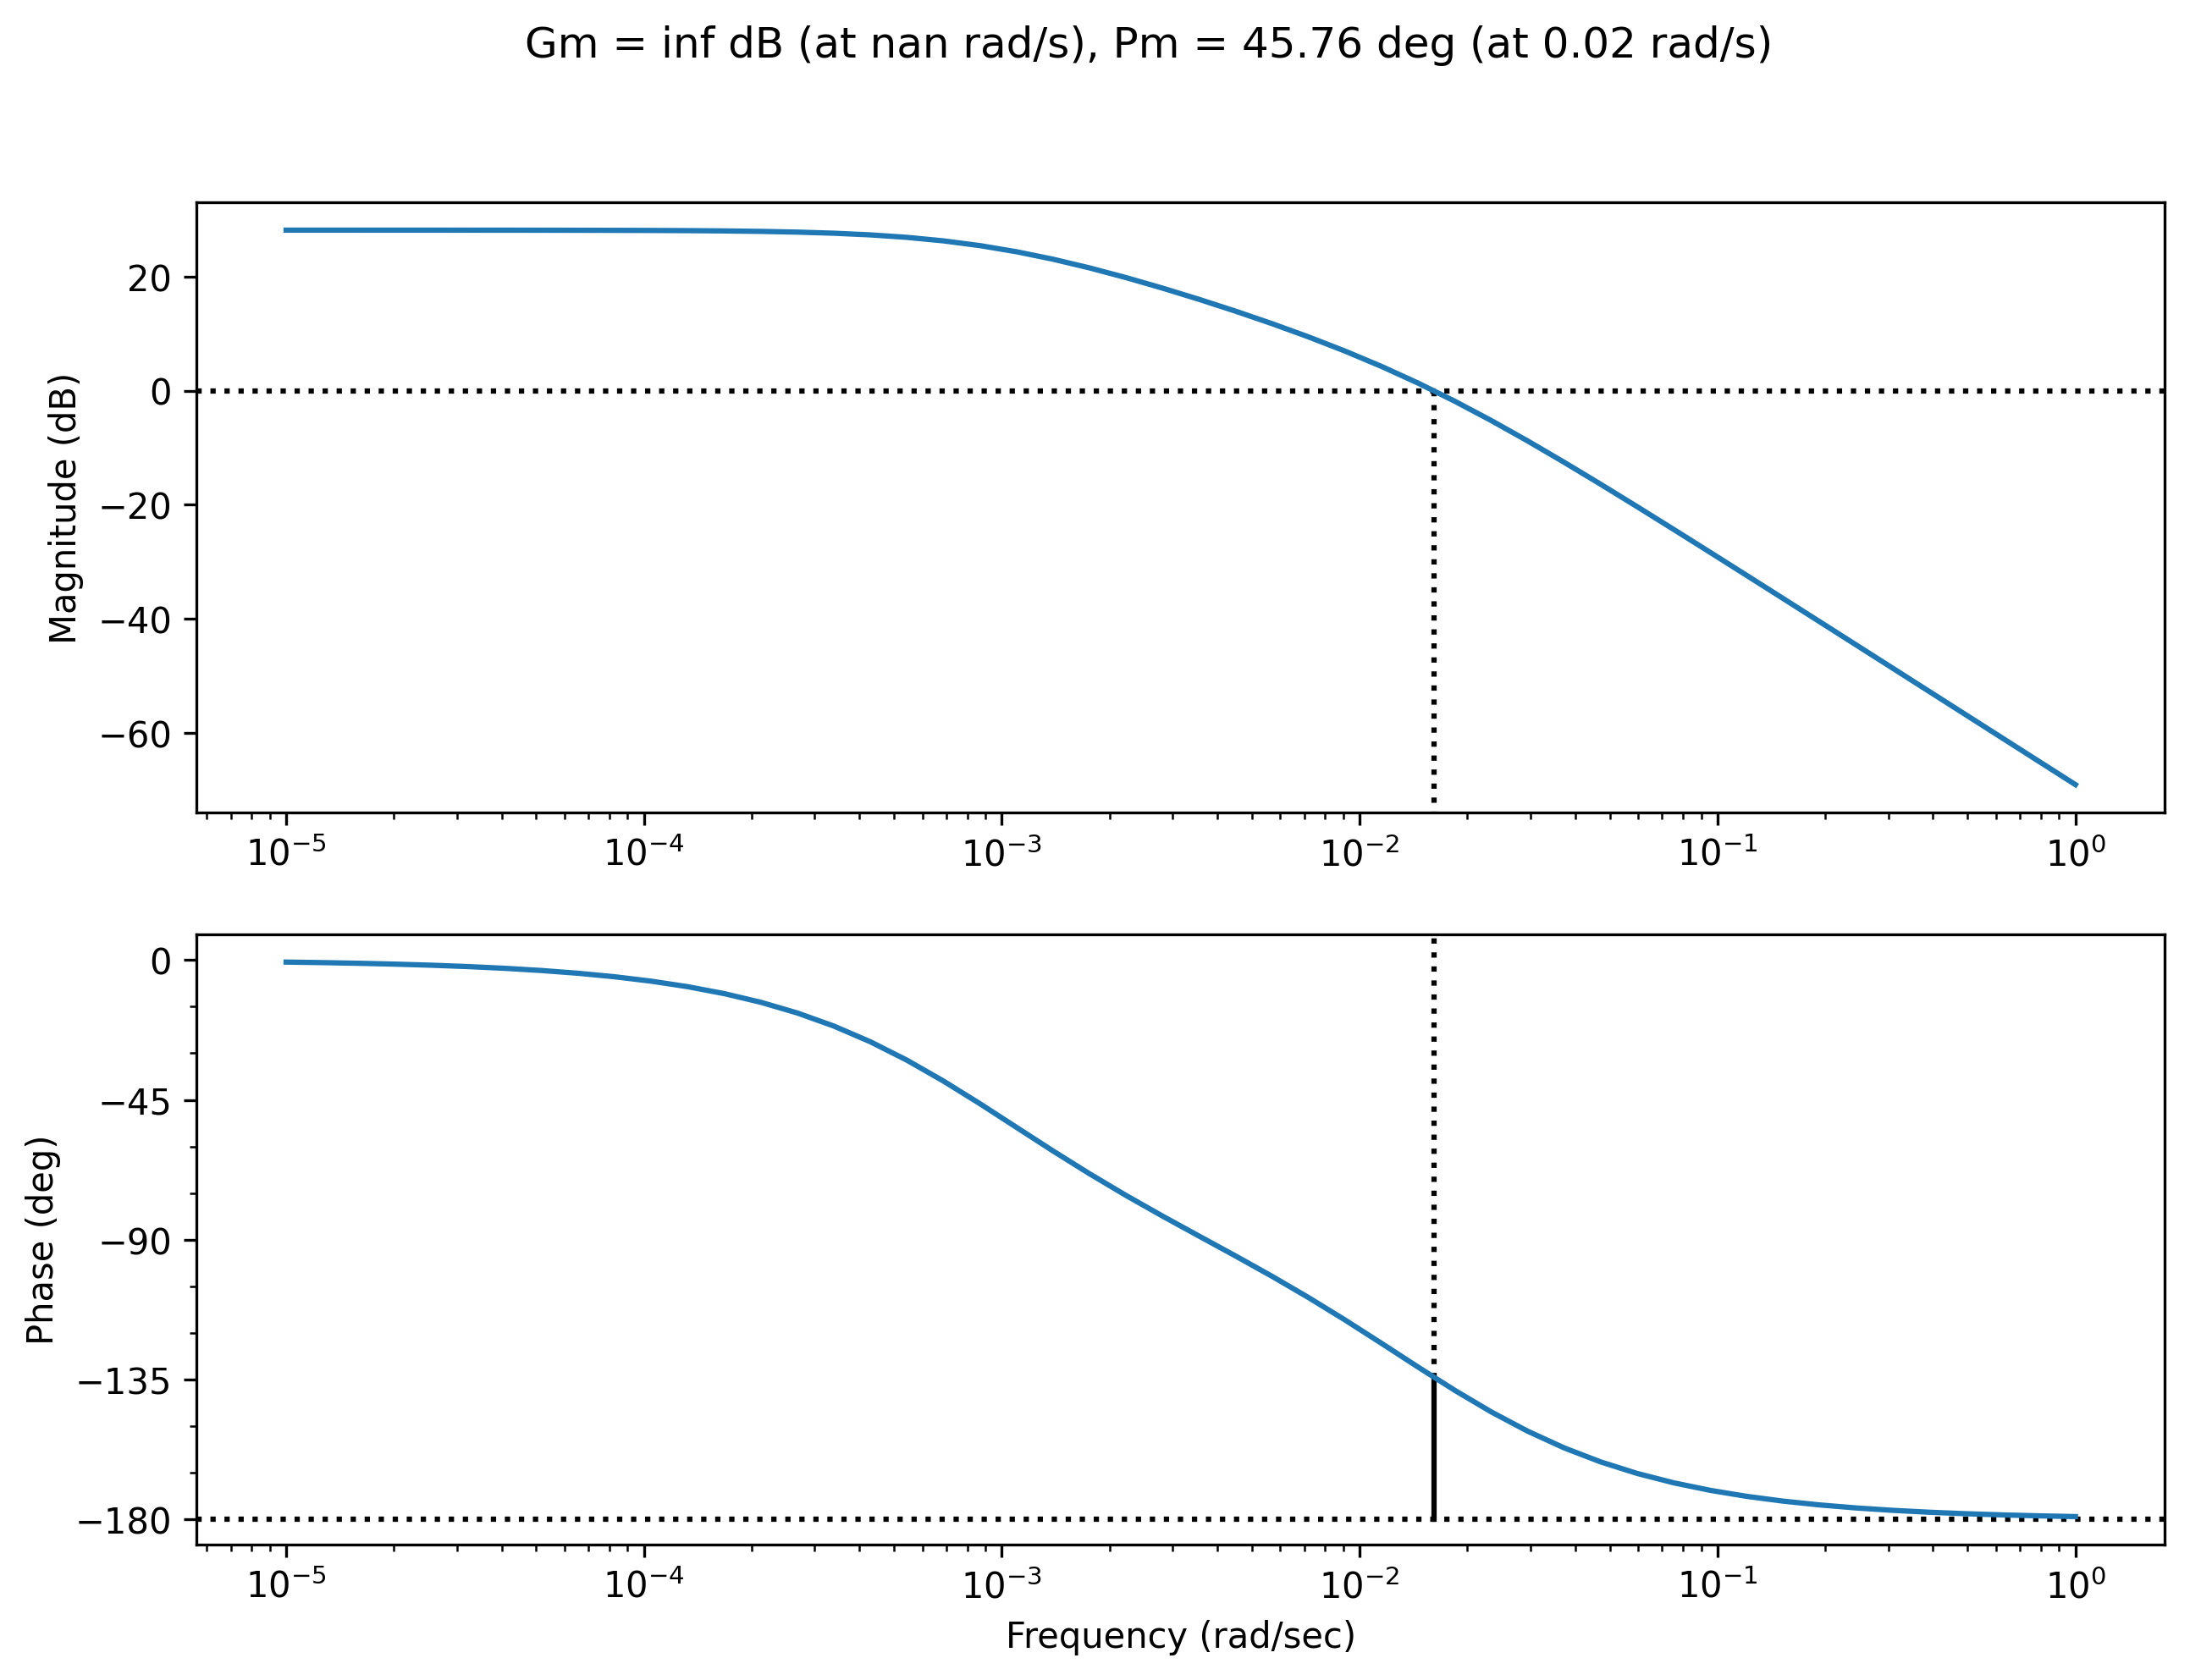

In [2]:
def step_plot(sys, T=None):
    fig = plt.figure(num=None, figsize=(10,7), dpi=300, facecolor='w', edgecolor='k')
    ty,tx = step(sys, T) if T else step(sys)
    plt.plot(tx,ty)
    plt.show()
    plt.close()
    print("Polos:")
    polos = pole(sys)
    for p in polos:
        print(p)
    else:
        print("\n-------------------\n")
    print("Zeros:")
    zeros = zero(sys)
    for z in zeros:
        print(z)
    else:
        print("\n-------------------\n")
    fig = plt.figure(num=None, figsize=(10,7), dpi=300, facecolor='w', edgecolor='k')
    pzmap(sys, True, figure = fig)
    plt.show()
    plt.close()

print("Reposta ao degrau em malha aberta:")
step_plot(func, T = 10000)
print("Diagrama de Bode:")
fig2 = plt.figure(num=None, figsize=(10,7), dpi=300, facecolor='w', edgecolor='k')
bode(func, margins = True, figure = fig2)
plt.show()
plt.close()

Resposta ao degrau em malha fechada:


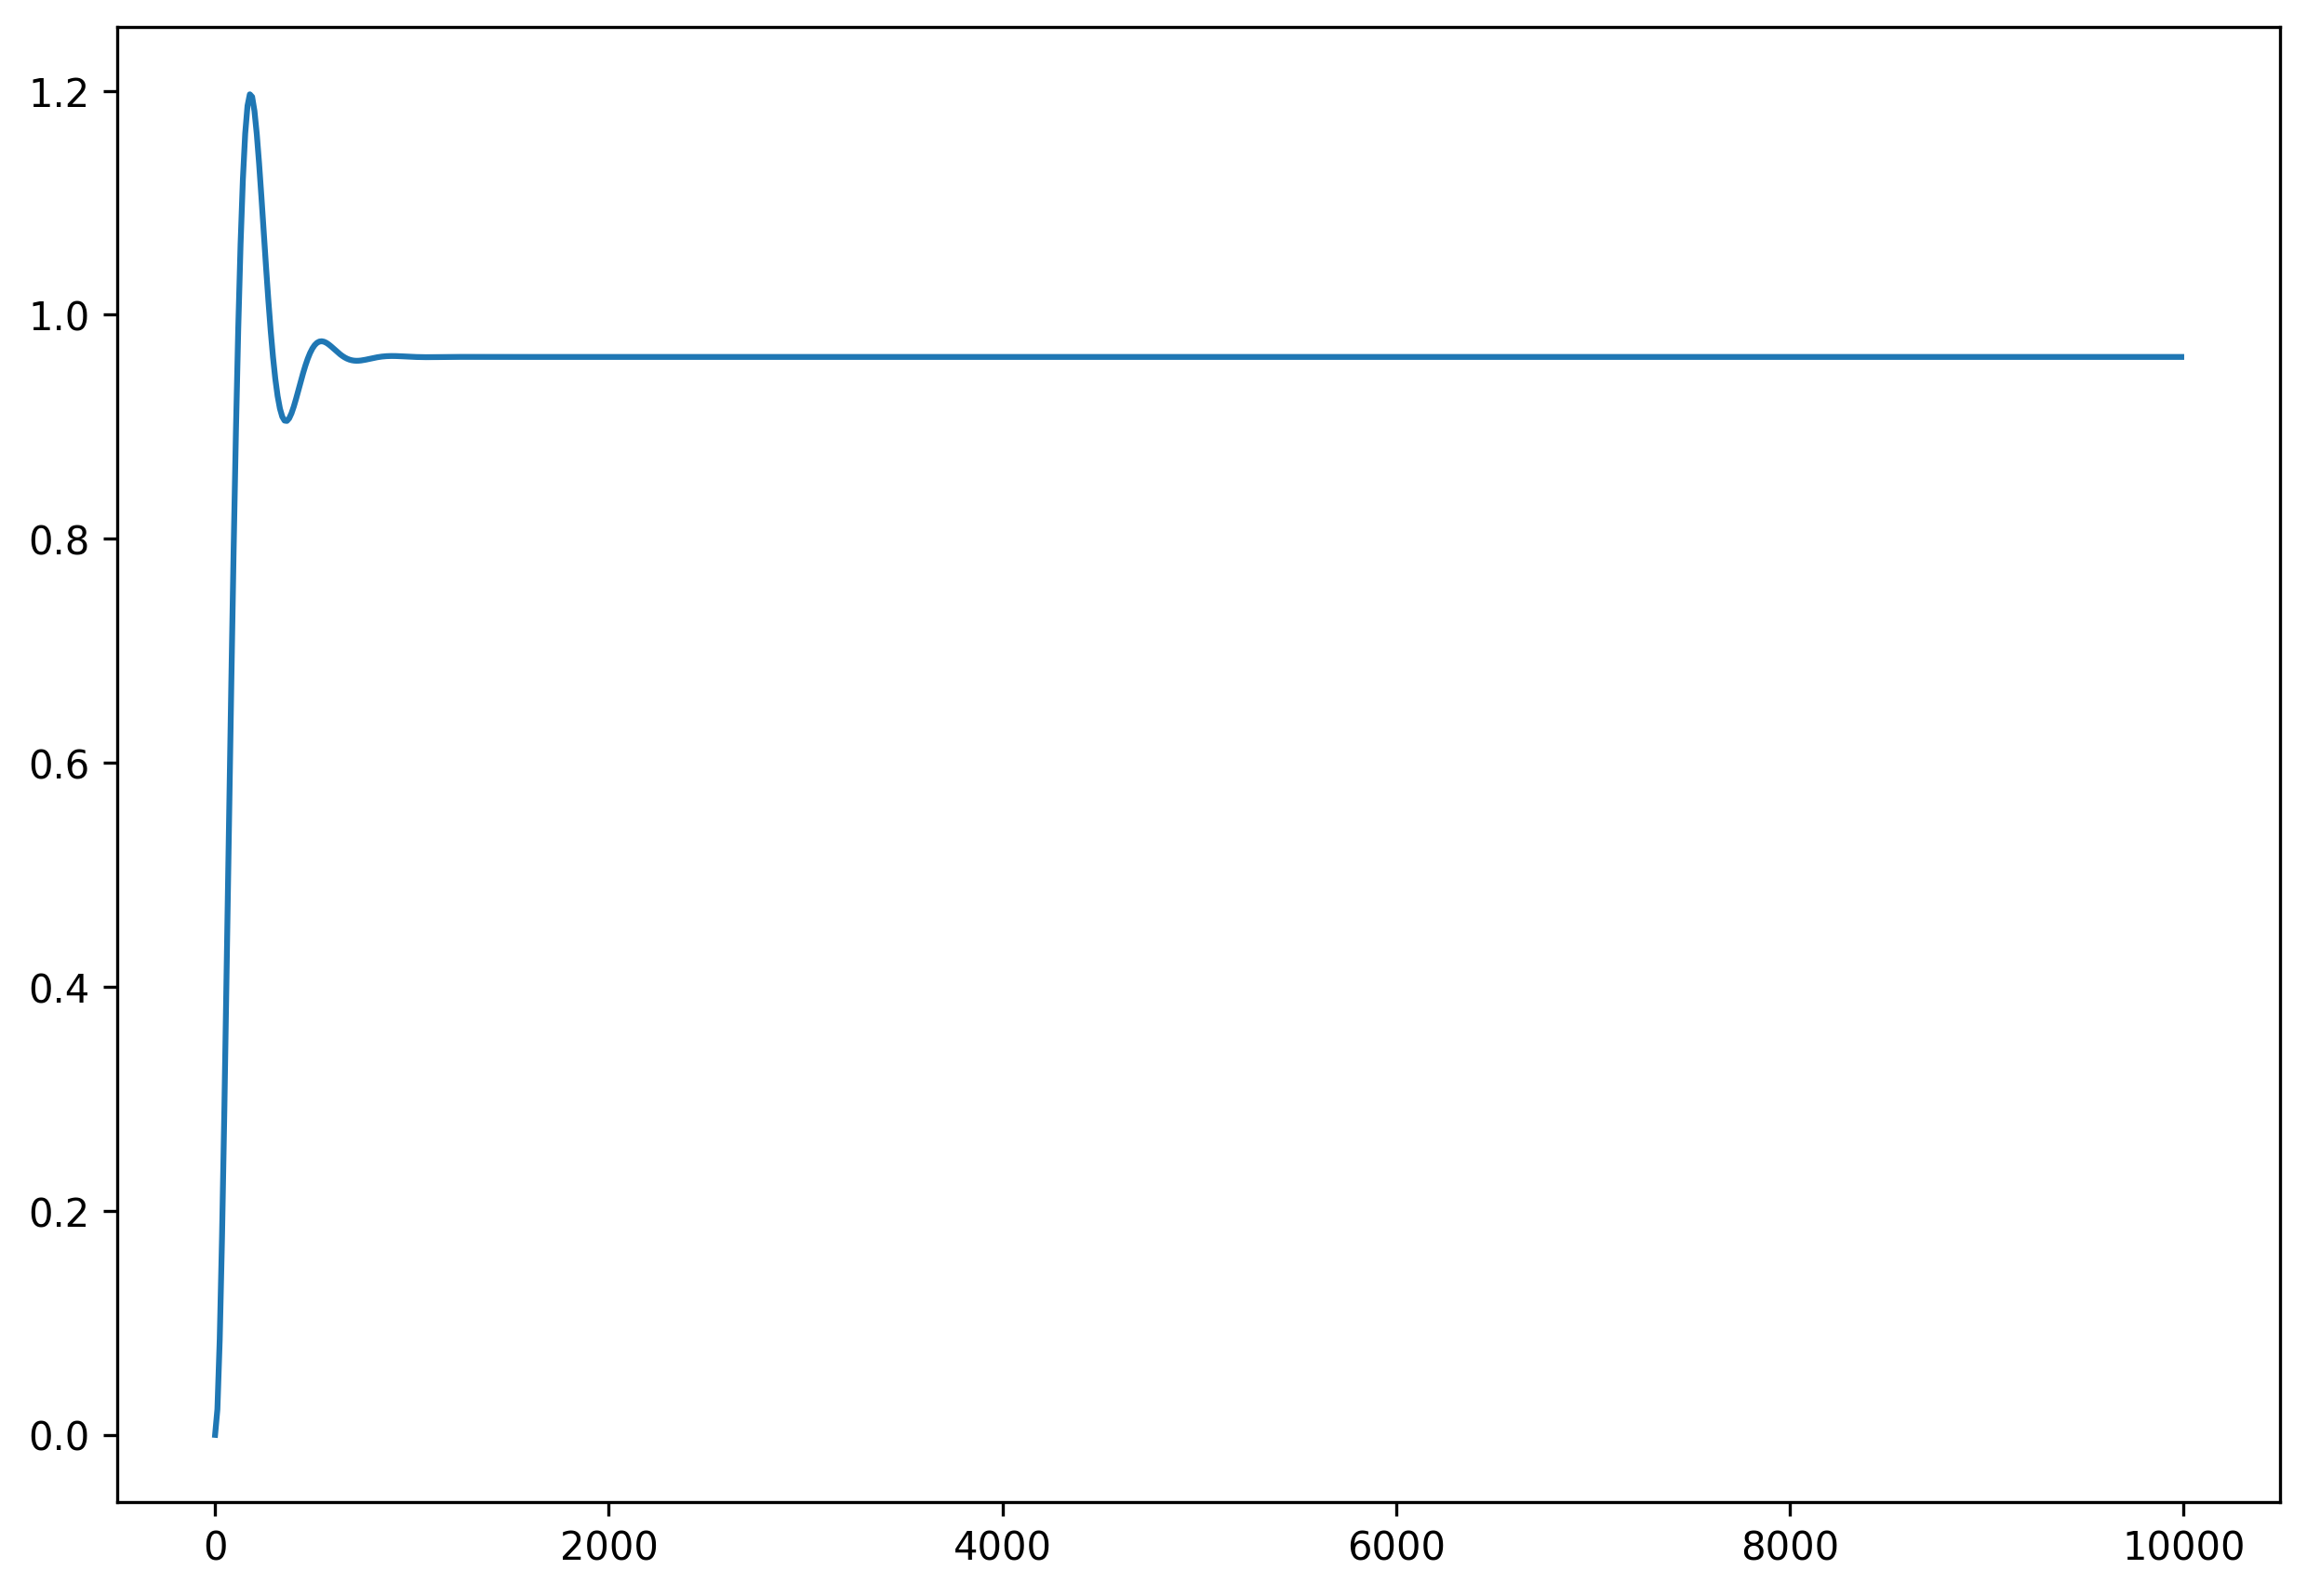

Polos:
(-0.007833052974105838+0.017455409449504883j)
(-0.007833052974105838-0.017455409449504883j)

-------------------

Zeros:

-------------------



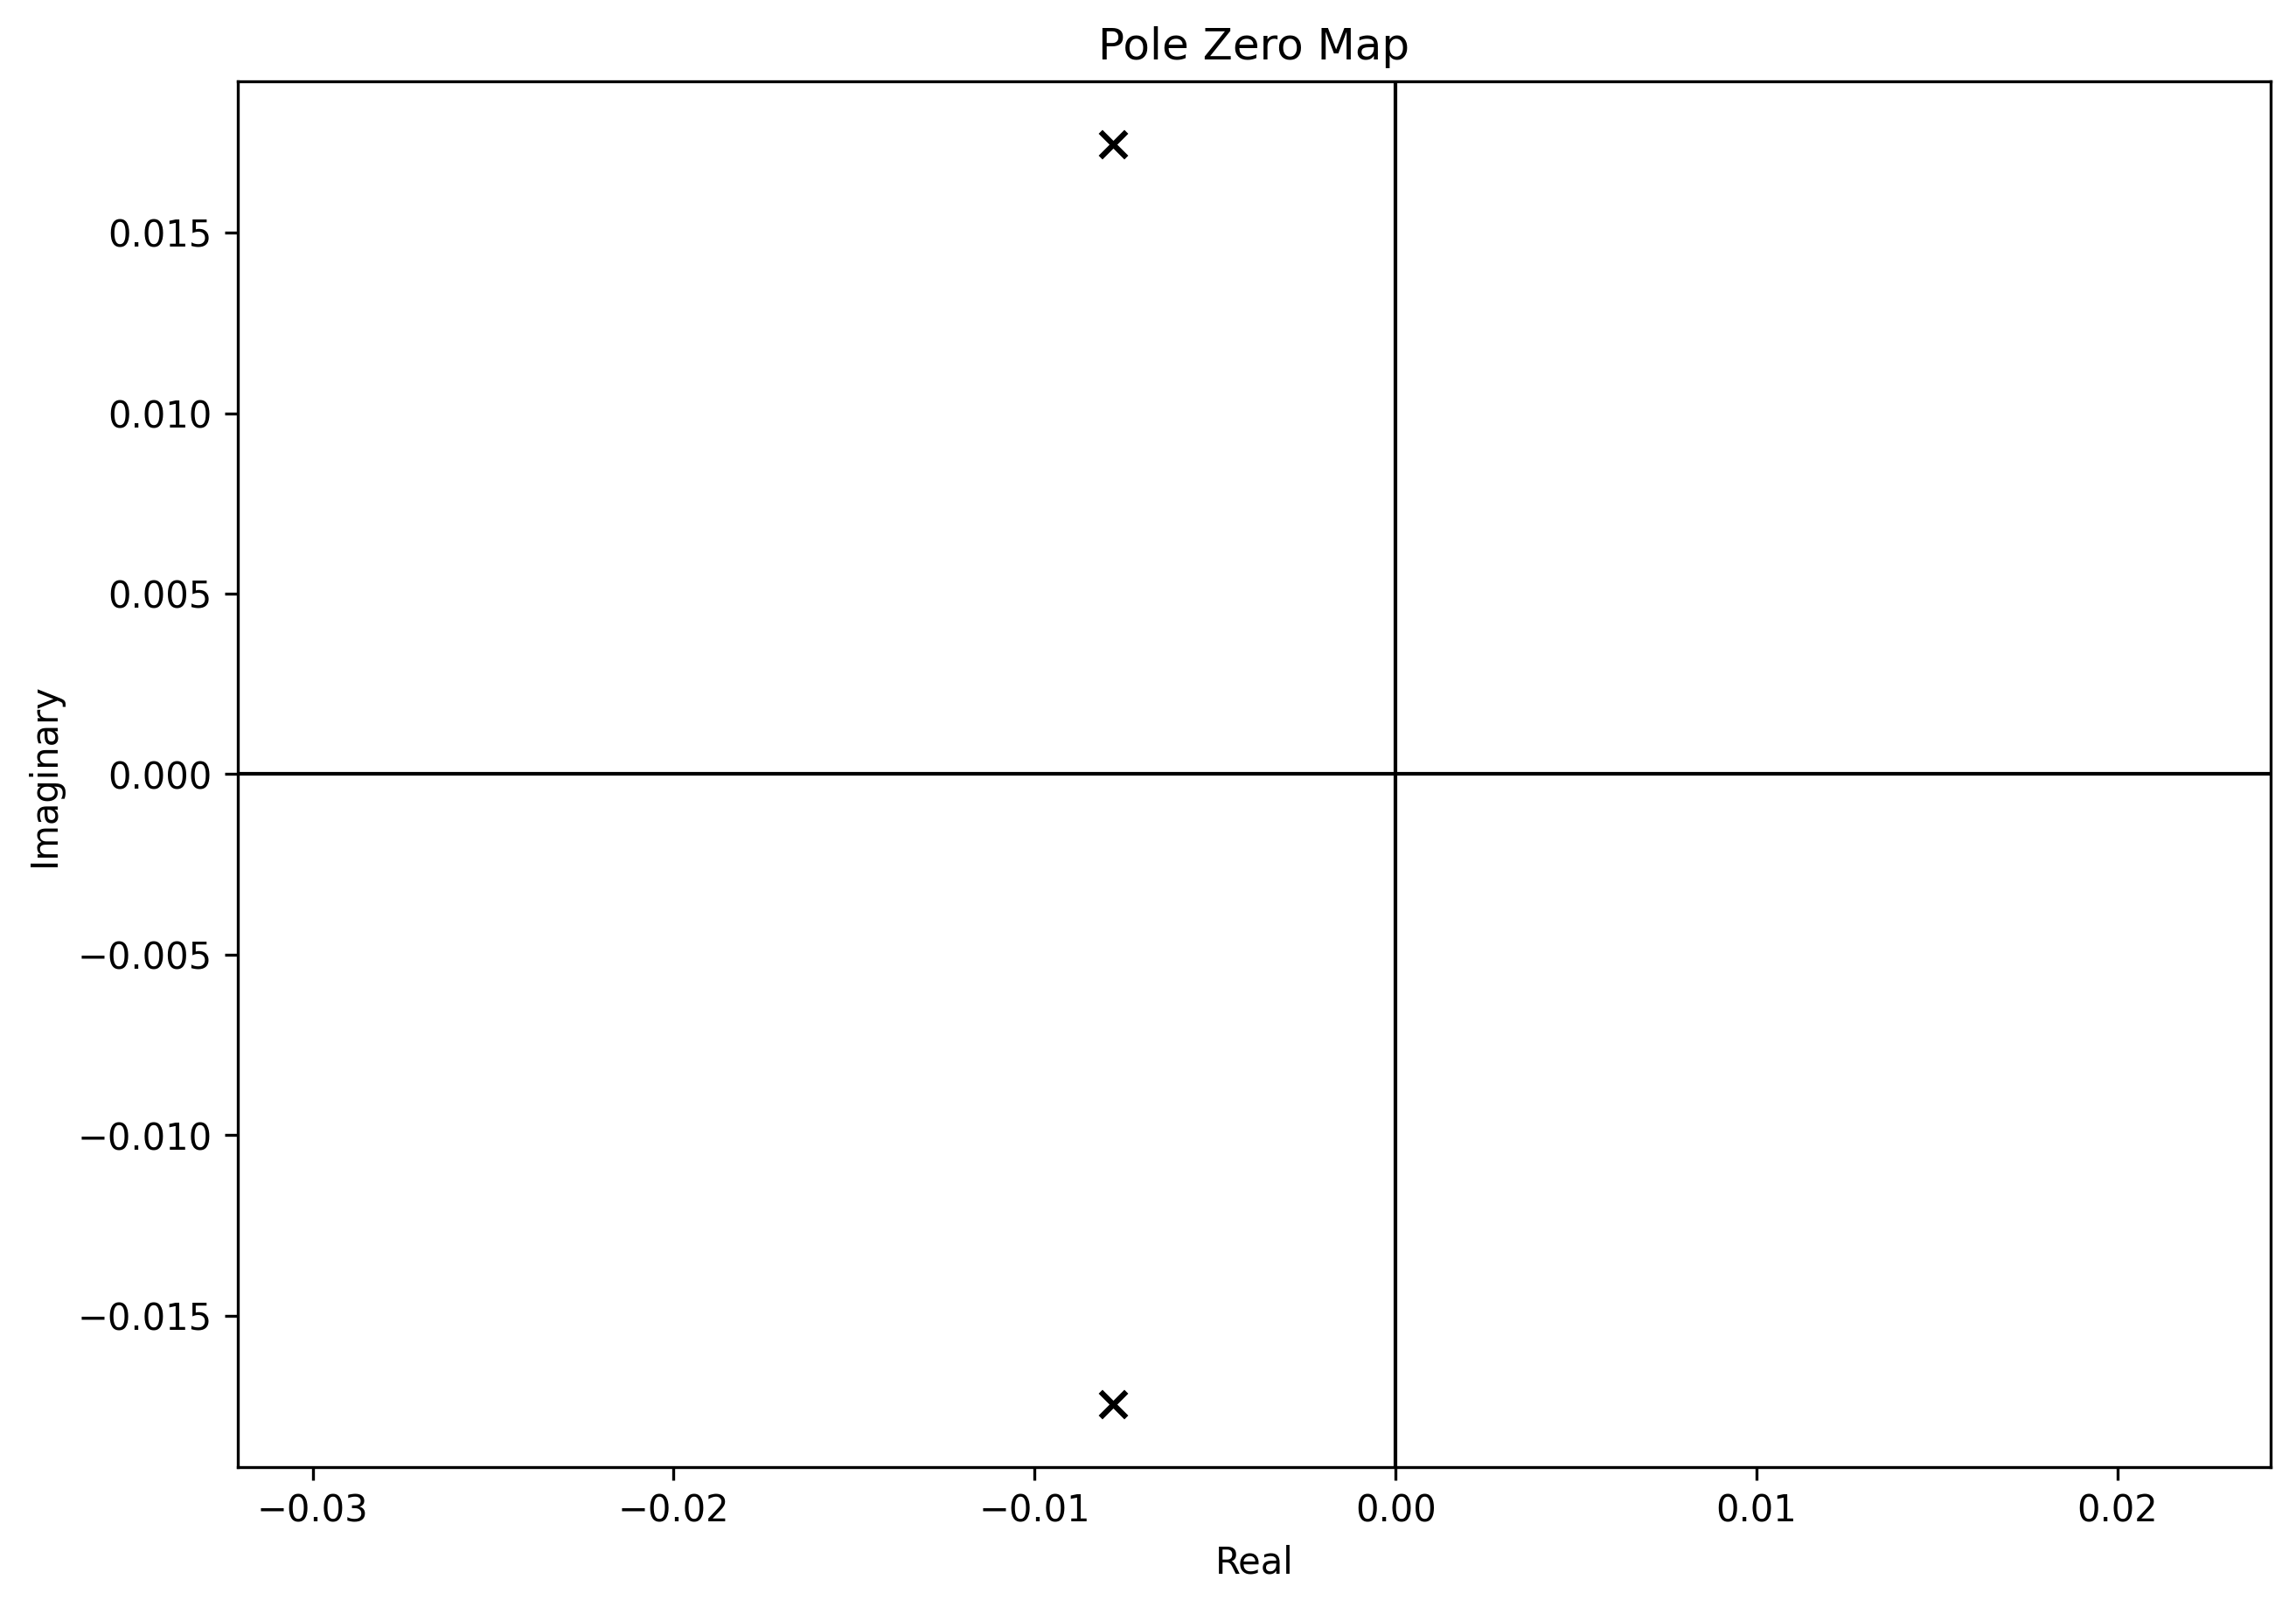

{'RiseTime': 70.58823529411765,
 'SettlingTime': 447.0588235294118,
 'SettlingMin': 0.8961126302934374,
 'SettlingMax': 1.1967926147272212,
 'Overshoot': 24.363747987233438,
 'Undershoot': 0.0,
 'Peak': 1.1967926147272212,
 'PeakTime': 176.47058823529414,
 'SteadyStateValue': 0.9623323790869329}

In [3]:
print("Resposta ao degrau em malha fechada:")
step_plot(feedback_func, T = 10000)
stepinfo(feedback_func, T = 10000)

## Projeto do controlador PID usando o critério de Routh.

Considerando o controlador PID:

$$ \large C(s) = \left(K_D . s + K_p + \frac{K_i}{s}\right)$$

Considerando a função de transferência dada anteriormente:

$$\large G(s) = \frac{25.548}{7.2526\times10^4 s^2+1.1362\times10^3 s+1}$$

Simulando em malha aberta teremos:

$$\large Y(s) = G(s)C(s) = \frac{25.548\left(K_D . s + K_p + \frac{K_i}{s}\right)}{7.2526\times10^4 s^2+1.1362\times10^3 s+1}$$

Multiplicando numerador e denominador por s, temos:

$$\large Y(s) = \frac{25.548\left(K_D . s^2 + K_p . s + K_i\right)}{7.2526\times10^4 s^3+1.1362\times10^3 s^2+s}$$

Considerando que o polinômio característico da função acima é:

$$\large P(s) = 7.2526\times10^4 s^3+1.1362\times10^3 s^2+s $$

Suas raízes (polos) são:

$$\large s = -0.01473 , s = -0.000936057 , s = 0$$

Assim, por haver um polo na origem, este sistema será sempre instável e o controlador não atenderá a sua finalidade. Para contornar esta adversidade, uma solução viável é utilizar a planta com o mesmo controlador, porém em malha fechada.

Desta forma, teremos:

$$\large Y(s) = \frac{G(s)C(s)}{1 + G(s)C(s)} $$


$$\large Y(s) = \frac{\frac{25.548\left(K_D . s^2 + K_p . s + K_i\right)}{7.2526\times10^4 s^3+1.1362\times10^3 s^2+s}}{1 + \frac{25.548\left(K_D . s^2 + K_p . s + K_i\right)}{7.2526\times10^4 s^3+1.1362\times10^3 s^2+s}} $$


$$\large Y(s) = \frac{\frac{25.548\left(K_D . s^2 + K_p . s + K_i\right)}{7.2526\times10^4 s^3+1.1362\times10^3 s^2+s}}{\frac{ 7.2526\times10^4 s^3+1.1362\times10^3 s^2+s + 25.548 \left(K_D . s^2 + K_p . s + K_i\right)}{7.2526\times10^4 s^3+1.1362\times10^3 s^2+s}} $$


$$ Y(s) = \frac{25.548\left(K_D . s^2 + K_p . s + K_i\right)}{7.2526\times10^4 s^3+1.1362\times10^3 s^2+s + 25.548 \left(K_D . s^2 + K_p . s + K_i\right)} $$


$$ Y(s) = \frac{25.548\left(K_D . s^2 + K_p . s + K_i\right)}{7.2526\times10^4 s^3+1.1362\times10^3 s^2+s + 25.548K_D . s^2 + 25.548K_p . s + 25.548K_i} $$

$$ Y(s) = \frac{25.548\left(K_D . s^2 + K_p . s + K_i\right)}{7.2526\times10^4 s^3+(1.1362\times10^3 + 25.548K_D) s^2 + (1+ 25.548K_p )s  + 25.548K_i} $$

Para facilitar, adotaremos as seguintes substituições:

$$ \large A = 1.1362\times10^3 + 25.548K_D $$

$$ \large B = 1+ 25.548K_p $$

$$ \large C = 25.548K_i $$

Desta maneira, o polinômio característico será:

$$ \large P(s) = 7.2526\times10^4 s^3+ A s^2 + Bs  + C $$

Realizando o critério de Routh-Hurwitz:

|     	|                        	|   	|
|-----	|------------------------	|---	|
| $$S^3$$ 	| $$7.2526 \times 10^4$$ 	| $$B $$	|
| $$S^2$$ 	| $$A$$                     	| $$C$$ 	|
| $$S$$   	| $$D$$                      	| $$0 $$	|
| $$1$$   	| $$C$$                      	| $$0$$ 	|

Em que,

$$ \large D = \frac{AB - 7.2526.10^4 C}{A} $$

Para que o sistema seja estável:

$$\large A > 0, D > 0, C > 0 $$

Então:

$$ \large \frac{AB - 7.2526.10^4 C}{A} > 0 $$

$$ \large AB - 7.2526.10^4 C > 0 $$

$$ \large AB > 7.2526.10^4 C $$

Teremos:

In [4]:
#ki = 0.002
#kp = 10
#kd = 500
def otimizar(ki,kp,kd):
    A = 1.1362*10**3 + 25.548*kd
    B = 1 + 25.548*kp
    C = 25.548*ki

    checagem = A*B > (7.2526*(10**4))*C
    
    if checagem:    
        funcao = 25.548*tf([kd,kp,ki],[7.2526*(10**4), A,B,C])
        return stepinfo(funcao, T=50), funcao
    return checagem, None

import numpy as np

ki = np.arange(0.001, 0.05, 0.001)
kp = np.arange(5.0, 15.0, 1.0)
kd = np.arange(10, 1000, 10)

info, funcao = otimizar(0.002,10,500)
res = {"ki":0.002, "kp":10, "kd":500, "info":info, 'funcao':funcao }

for i in ki:
    for p in kp:
        for d in kd:
            info, funcao = otimizar(i,p,d)
            if funcao:
                if info['SettlingTime']<res['info']['SettlingTime'] and 1-info['SteadyStateValue']<1-res['info']['SteadyStateValue']:
                    res = {"ki":i, "kp":p, "kd":d, "info":info, 'funcao':funcao }
print(res)

{'ki': 0.038, 'kp': 14.0, 'kd': 530, 'info': {'RiseTime': 11.0, 'SettlingTime': 18.0, 'SettlingMin': 0.9282814026706484, 'SettlingMax': 1.0356105059647838, 'Overshoot': 0.8107185747751825, 'Undershoot': 0.0, 'Peak': 1.0356105059647838, 'PeakTime': 31.0, 'SteadyStateValue': 1.0272821388497808}, 'funcao': TransferFunction(array([1.354044e+04, 3.576720e+02, 9.708240e-01]), array([7.252600e+04, 1.467664e+04, 3.586720e+02, 9.708240e-01]))}


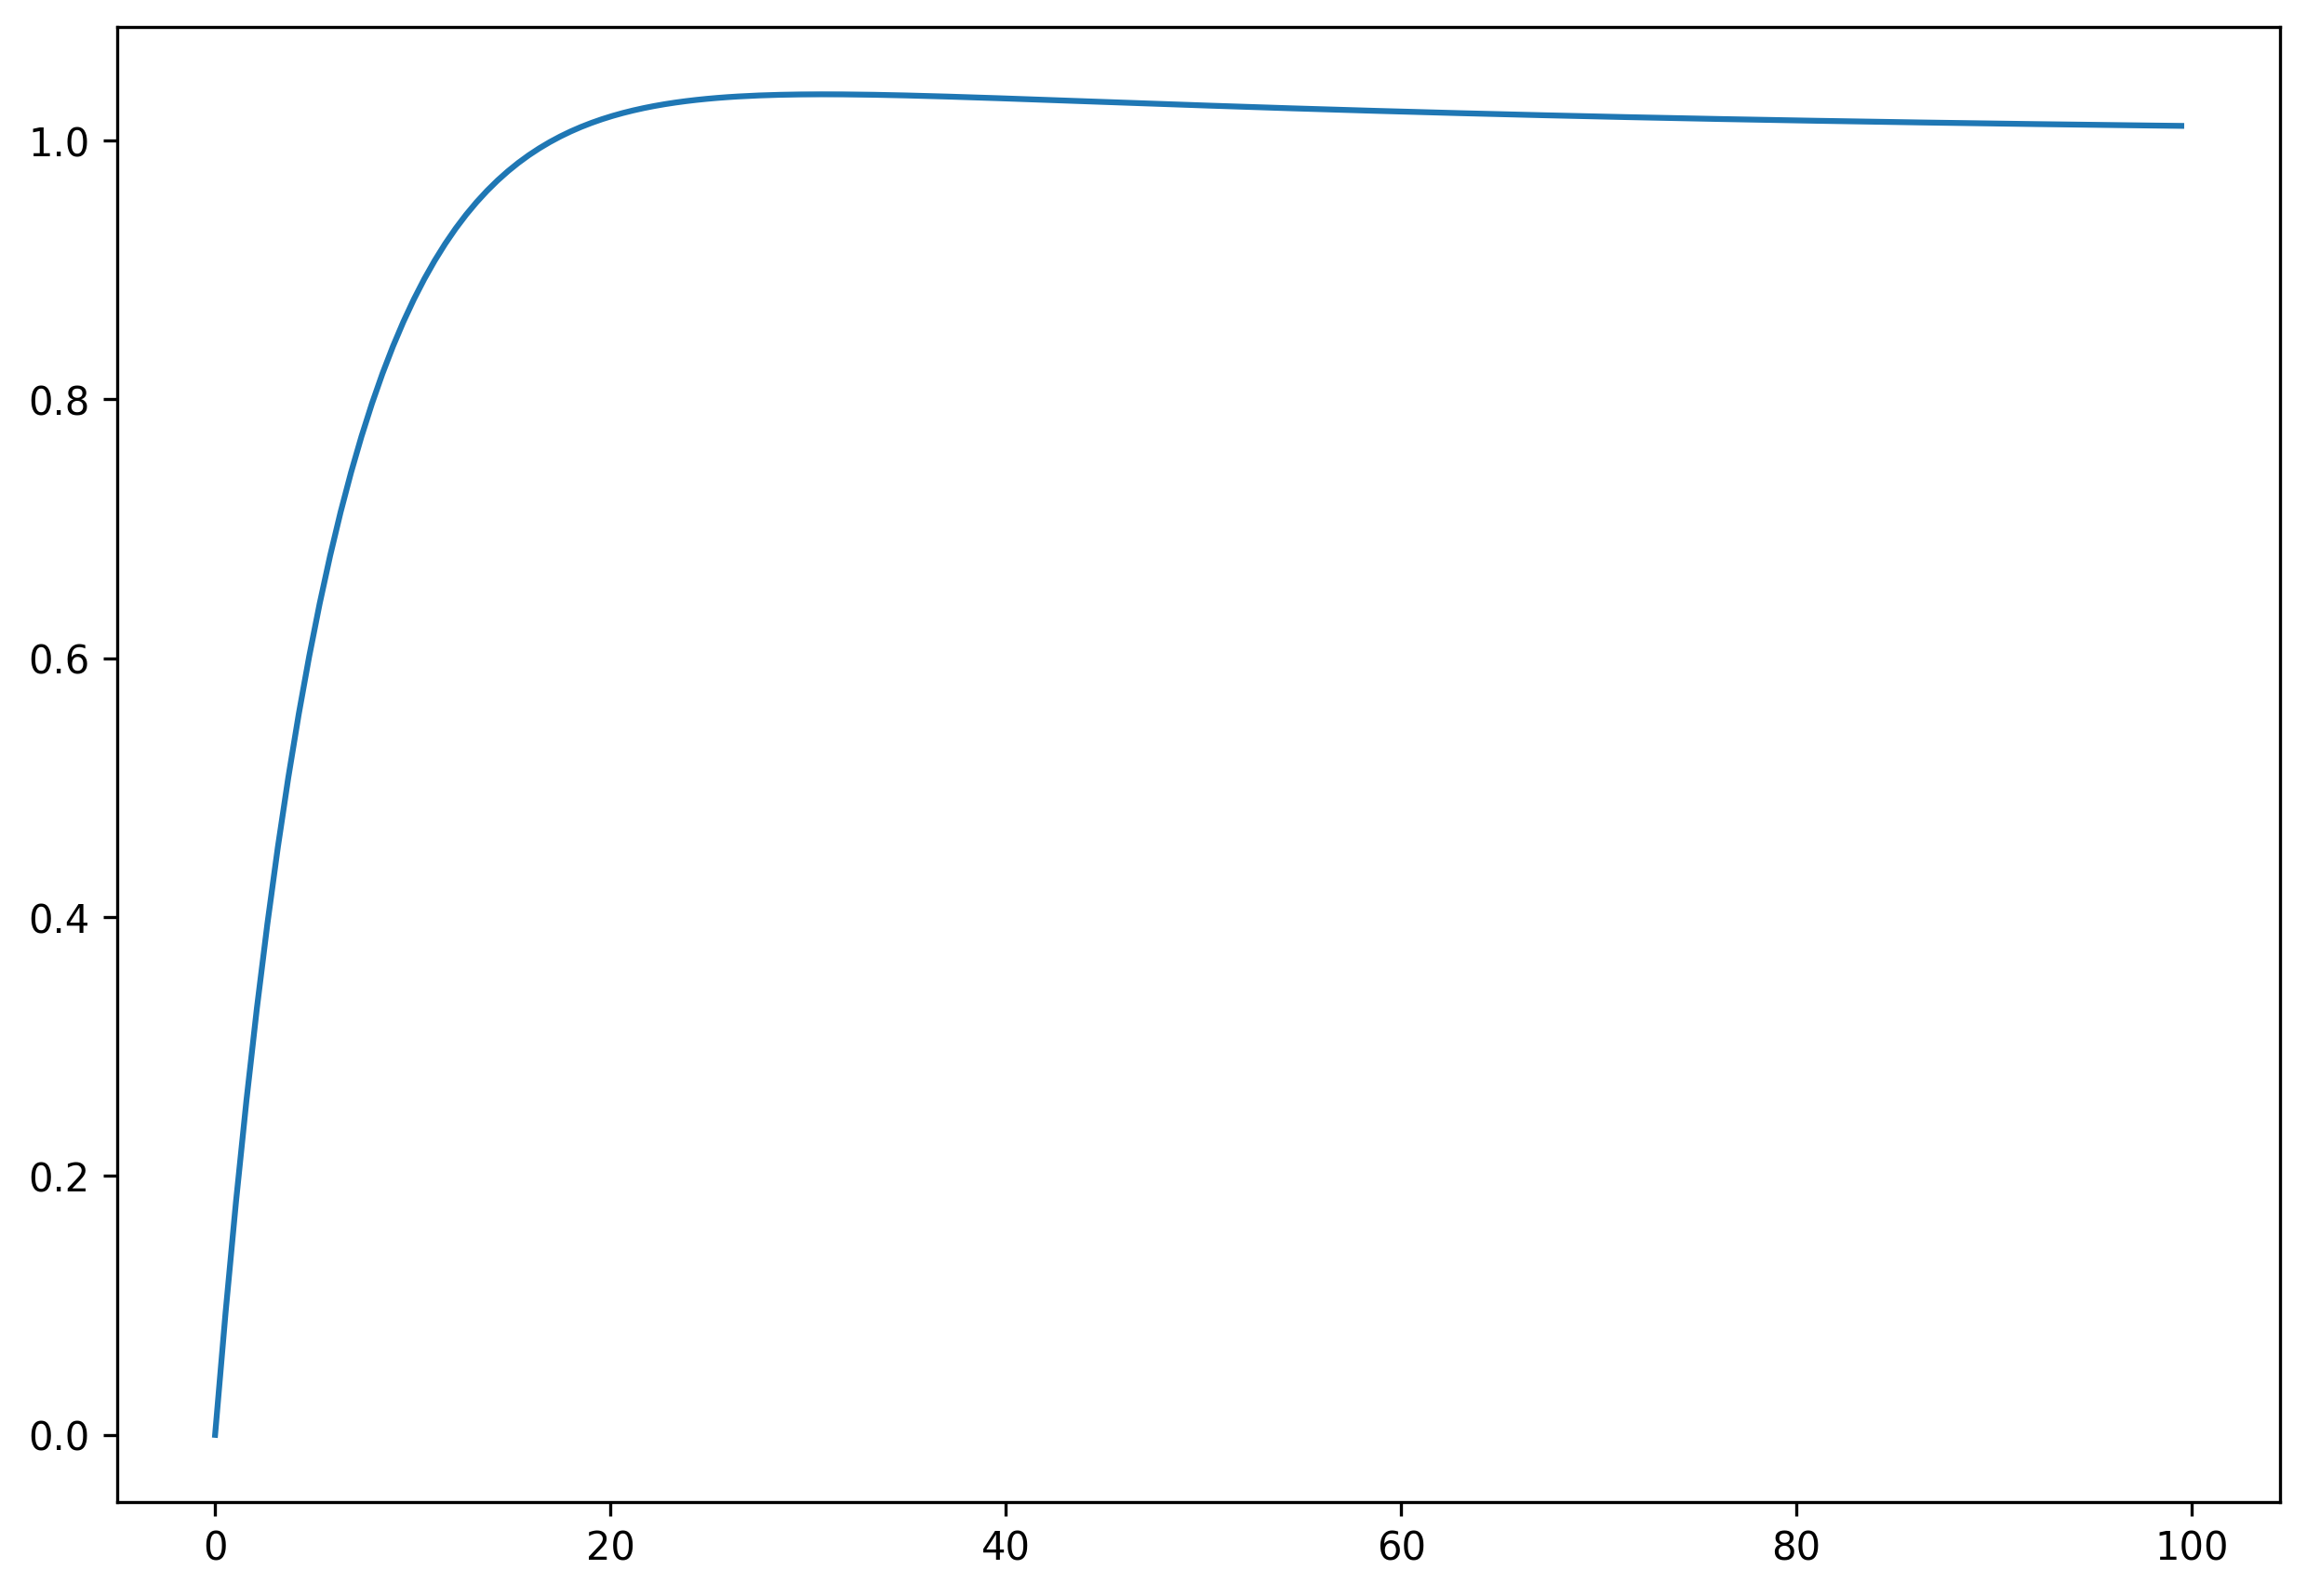

In [5]:
fig = plt.figure(num=None, figsize=(10,7), dpi=300, facecolor='w', edgecolor='k')
pid = res['funcao']
ty, tx = step(res['funcao'], T=100)
plt.plot(tx,ty)
plt.show()
plt.close()

Assim, após algumas iterações, escolhemos os seguintes valores:

$$ \large K_i = 0.038, K_p = 14, K_D = 530 $$

Os índices de desenpenho de reposta ao degrau foram:

    Tempo de subida: 11s
    Tempo de acomodação 18s
    Overshoot: 0.8107
    Tempo de pico: 31s

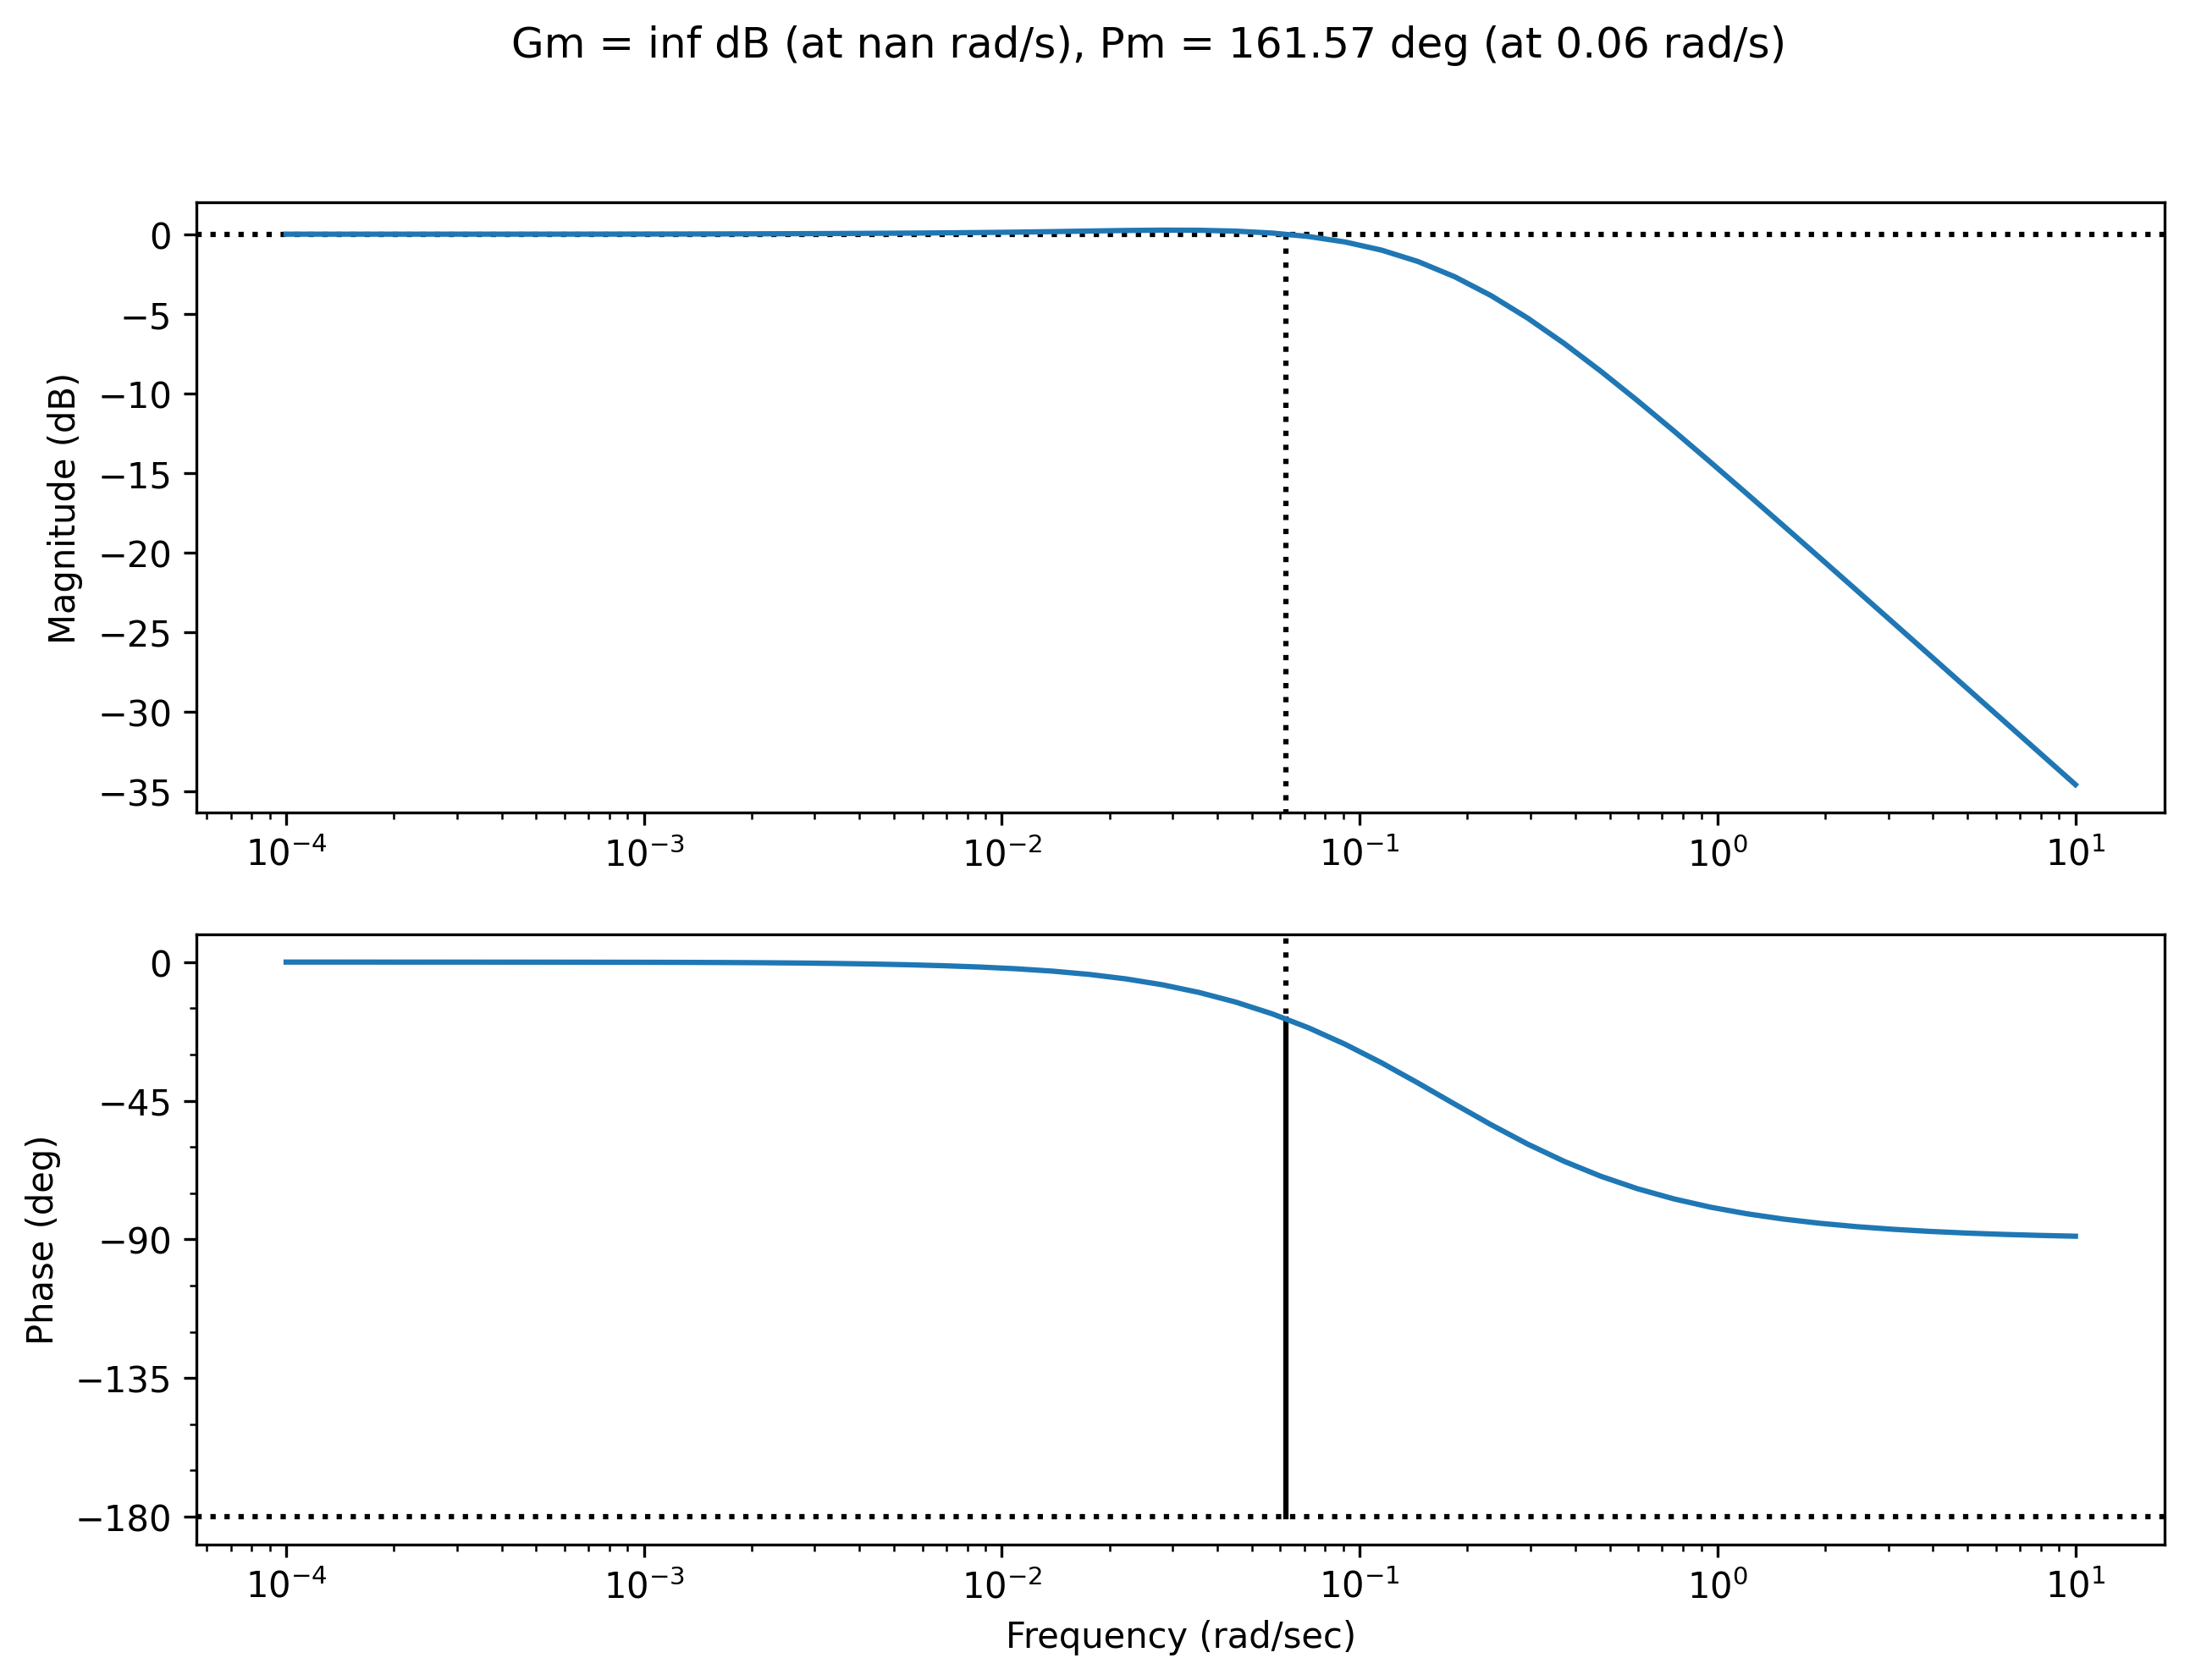

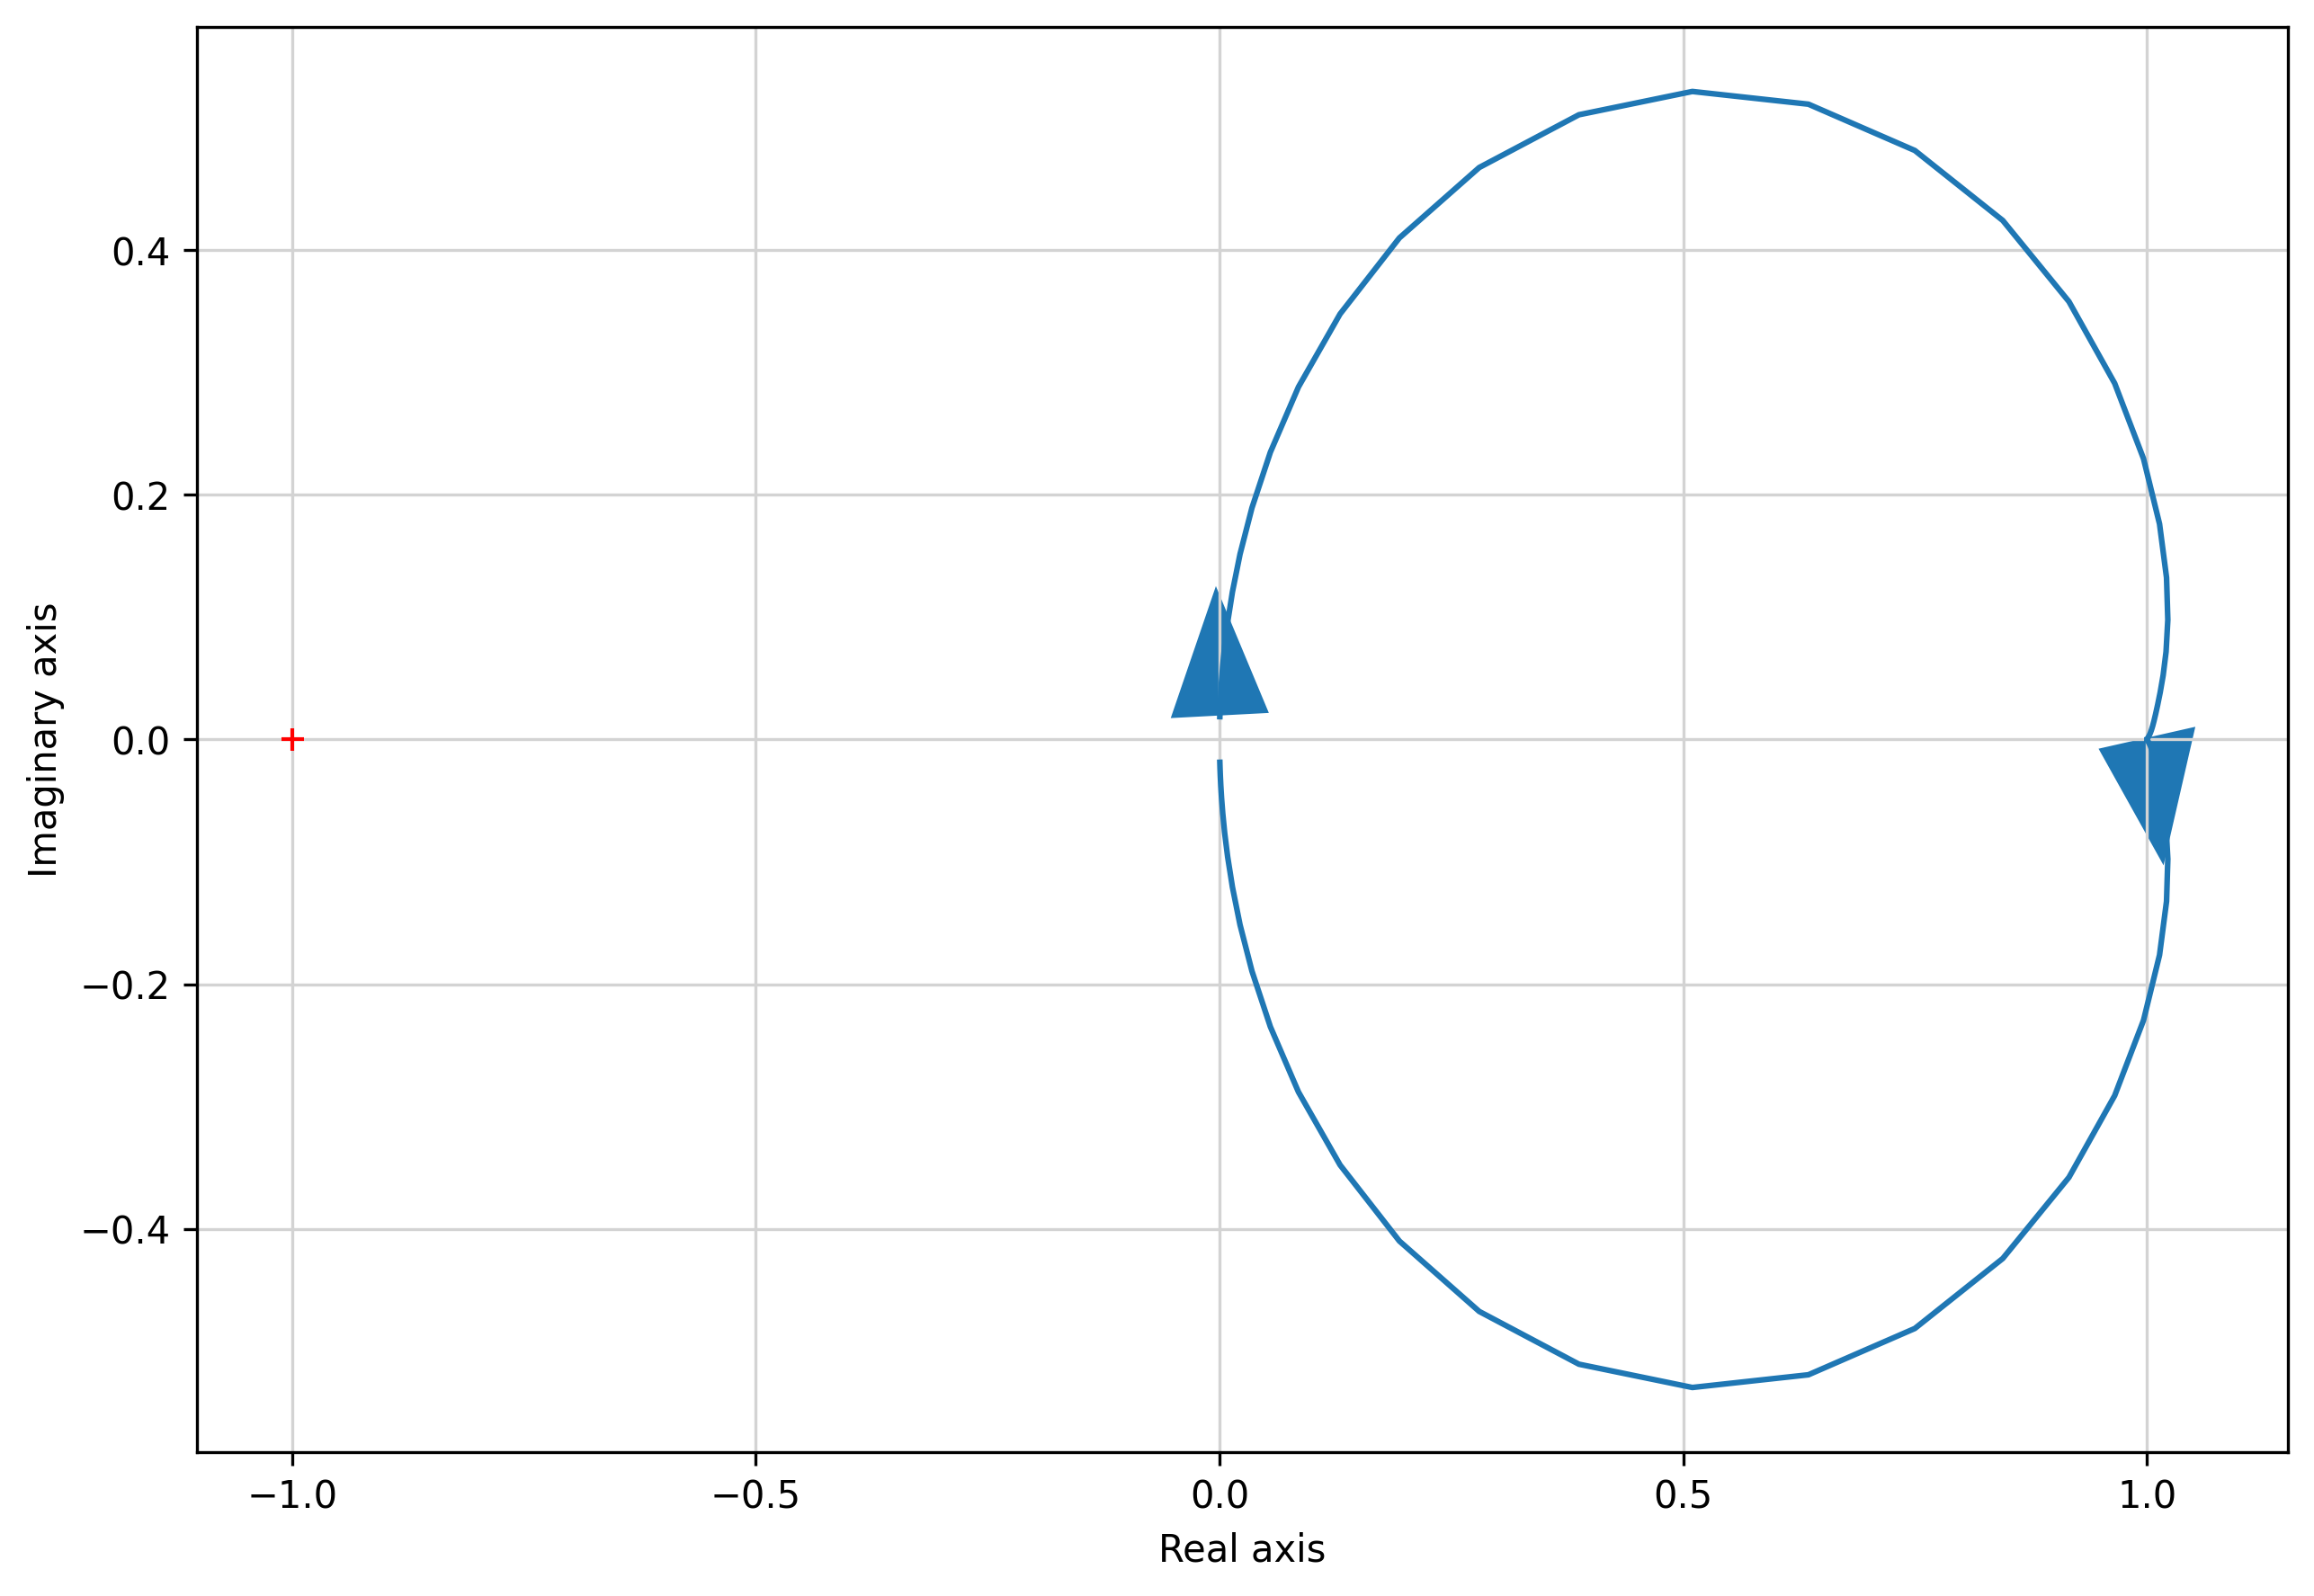

In [6]:
fig = plt.figure(num=None, figsize=(10,7), dpi=300, facecolor='w', edgecolor='k')
bode(res['funcao'], margins=True, figure = fig)
plt.show()
plt.close()
fig = plt.figure(num=None, figsize=(10,7), dpi=300, facecolor='w', edgecolor='k')
nyquist(res['funcao'], figure = fig)
plt.show()
plt.close()

## Projeto do controlador PI.

Seja o controlador PI:

$$ \large C(s) = \left(K_p + \frac{K_i}{s}\right) $$

Realizando a simplificação em malha aberta, temos:

$$\large Y(s) = G(s)C(s) = \frac{25.548\left( K_p + \frac{K_i}{s}\right)}{7.2526\times10^4 s^2+1.1362\times10^3 s+1}$$

$$\large Y(s) = G(s)C(s) = \frac{25.548\left( K_p . s + K_i\right)}{(7.2526\times10^4 s^2+1.1362\times10^3 s+1)s}$$

A partir do denominador da função obtida, verificamos que uma das raízes deste polinômio é igual a 0, ou seja, a origem do plano imaginário. Isto implica que este sistema será sempre instável.

Assim, deve-se simular em malha fechada para contornar este entrave.

Em malha fecha teremos:

$$\large Y(s) = \frac{G(s)C(s)}{1 + G(s)C(s)} $$

$$\large Y(s) = \frac{\frac{25.548\left( K_p . s + K_i\right)}{(7.2526\times10^4 s^2+1.1362\times10^3 s+1)s}}{1 + \frac{25.548\left( K_p . s + K_i\right)}{(7.2526\times10^4 s^2+1.1362\times10^3 s+1)s}} $$

$$\large Y(s) = \frac{\frac{25.548\left( K_p . s + K_i\right)}{(7.2526\times10^4 s^2+1.1362\times10^3 s+1)s}}{\frac{ (7.2526\times10^4 s^2+1.1362\times10^3 s+1)s + 25.548\left( K_p . s + K_i\right)}{(7.2526\times10^4 s^2+1.1362\times10^3 s+1)s}} $$

$$\large Y(s) = \frac{\frac{25.548\left( K_p . s + K_i\right)}{(7.2526\times10^4 s^2+1.1362\times10^3 s+1)s}}{\frac{ (7.2526\times10^4 s^2+1.1362\times10^3 s+1)s + 25.548\left( K_p . s + K_i\right)}{(7.2526\times10^4 s^2+1.1362\times10^3 s+1)s}} $$

$$ \large Y(s) =  \frac{25.548\left( K_p . s + K_i\right)}{(7.2526\times10^4 s^2+1.1362\times10^3 s+1)s + 25.548\left( K_p . s + K_i\right)} $$

$$ \large Y(s) =  \frac{25.548\left( K_p . s + K_i\right)}{7.2526\times10^4 s^3+1.1362\times10^3 s^2+s + 25.548\left( K_p . s + K_i\right)} $$

$$ \large Y(s) =  \frac{25.548\left( K_p . s + K_i\right)}{7.2526\times10^4 s^3+1.1362\times10^3 s^2+ (1 + 25.548K_p)s + 25.548K_i} $$

Para facilitar as contas, adotaremos:

$$ \large A = 1 + 25.548K_p, B = 25.548K_i$$

Desta maneira, o polinômio característico será:

$$ \large P(s) = 7.2526\times10^4 s^3+1.1362\times10^3 s^2+ A s + B $$

Realizando o critério de Routh-Hurwitz:

|     	|                        	|   	|
|-----	|------------------------	|---	|
| $$S^3$$ 	| $$7.2526 \times 10^4$$ 	| $$A $$	|
| $$S^2$$ 	| $$1.1362\times10^3 $$                     	| $$B$$ 	|
| $$S$$   	| $$C$$                      	| $$0 $$	|
| $$1$$   	| $$B$$                      	| $$0$$ 	|

Em que:

$$ \large C = \frac{1.1362\times10^3A - 7.2526\times10^4B}{1.1362\times10^3}$$

e

$$\large C > 0, B > 0 $$

então,

$$ \large C = \frac{1.1362\times10^3A - 7.2526\times10^4B}{1.1362\times10^3} > 0 $$

$$ \large 1.1362\times10^3A - 7.2526\times10^4B > 0 $$

$$ \large 1.1362\times10^3A  > 7.2526\times10^4B $$

Assim, 

$$\large k_i = 0.005, k_p = 5$$

In [7]:
def otimiza(ki, kp):
    A = 1 + 25.548*kp
    B = 25.548*ki
    
    if (1.1362*(10**3))*A > (7.2526*(10**4))*B:
        funcao = 25.548*tf([kp,ki],[7.2526*(10**4),1.1362*(10**3),A,B])
        return stepinfo(funcao, T=1000), funcao
    return None,None

ki = np.arange(0.005, 0.015, 0.001)
kp = np.arange(1, 100, 0.1)

info, funcao = otimiza(0.01,30)
res = {"ki":0.01, "kp":30, "info":info, "funcao":funcao}

for i in ki:
    for p in kp:
        info, funcao = otimiza(i,p)
        if funcao:
            if info['SettlingTime']<res['info']['SettlingTime'] and 1-info['SteadyStateValue']<1-res['info']['SteadyStateValue']:
                res = {"ki":i, "kp":p, "info":info, "funcao":funcao}
print(res)

{'ki': 0.005, 'kp': 5.0000000000000036, 'info': {'RiseTime': 30.12048192771085, 'SettlingTime': 481.9277108433735, 'SettlingMin': 0.6730868225226162, 'SettlingMax': 1.5707598570644974, 'Overshoot': 56.937734183562746, 'Undershoot': 0.0, 'Peak': 1.5707598570644974, 'PeakTime': 78.3132530120482, 'SteadyStateValue': 1.0008809323239323}, 'funcao': TransferFunction(array([1.2774e+02, 1.2774e-01]), array([7.2526e+04, 1.1362e+03, 1.2874e+02, 1.2774e-01]))}


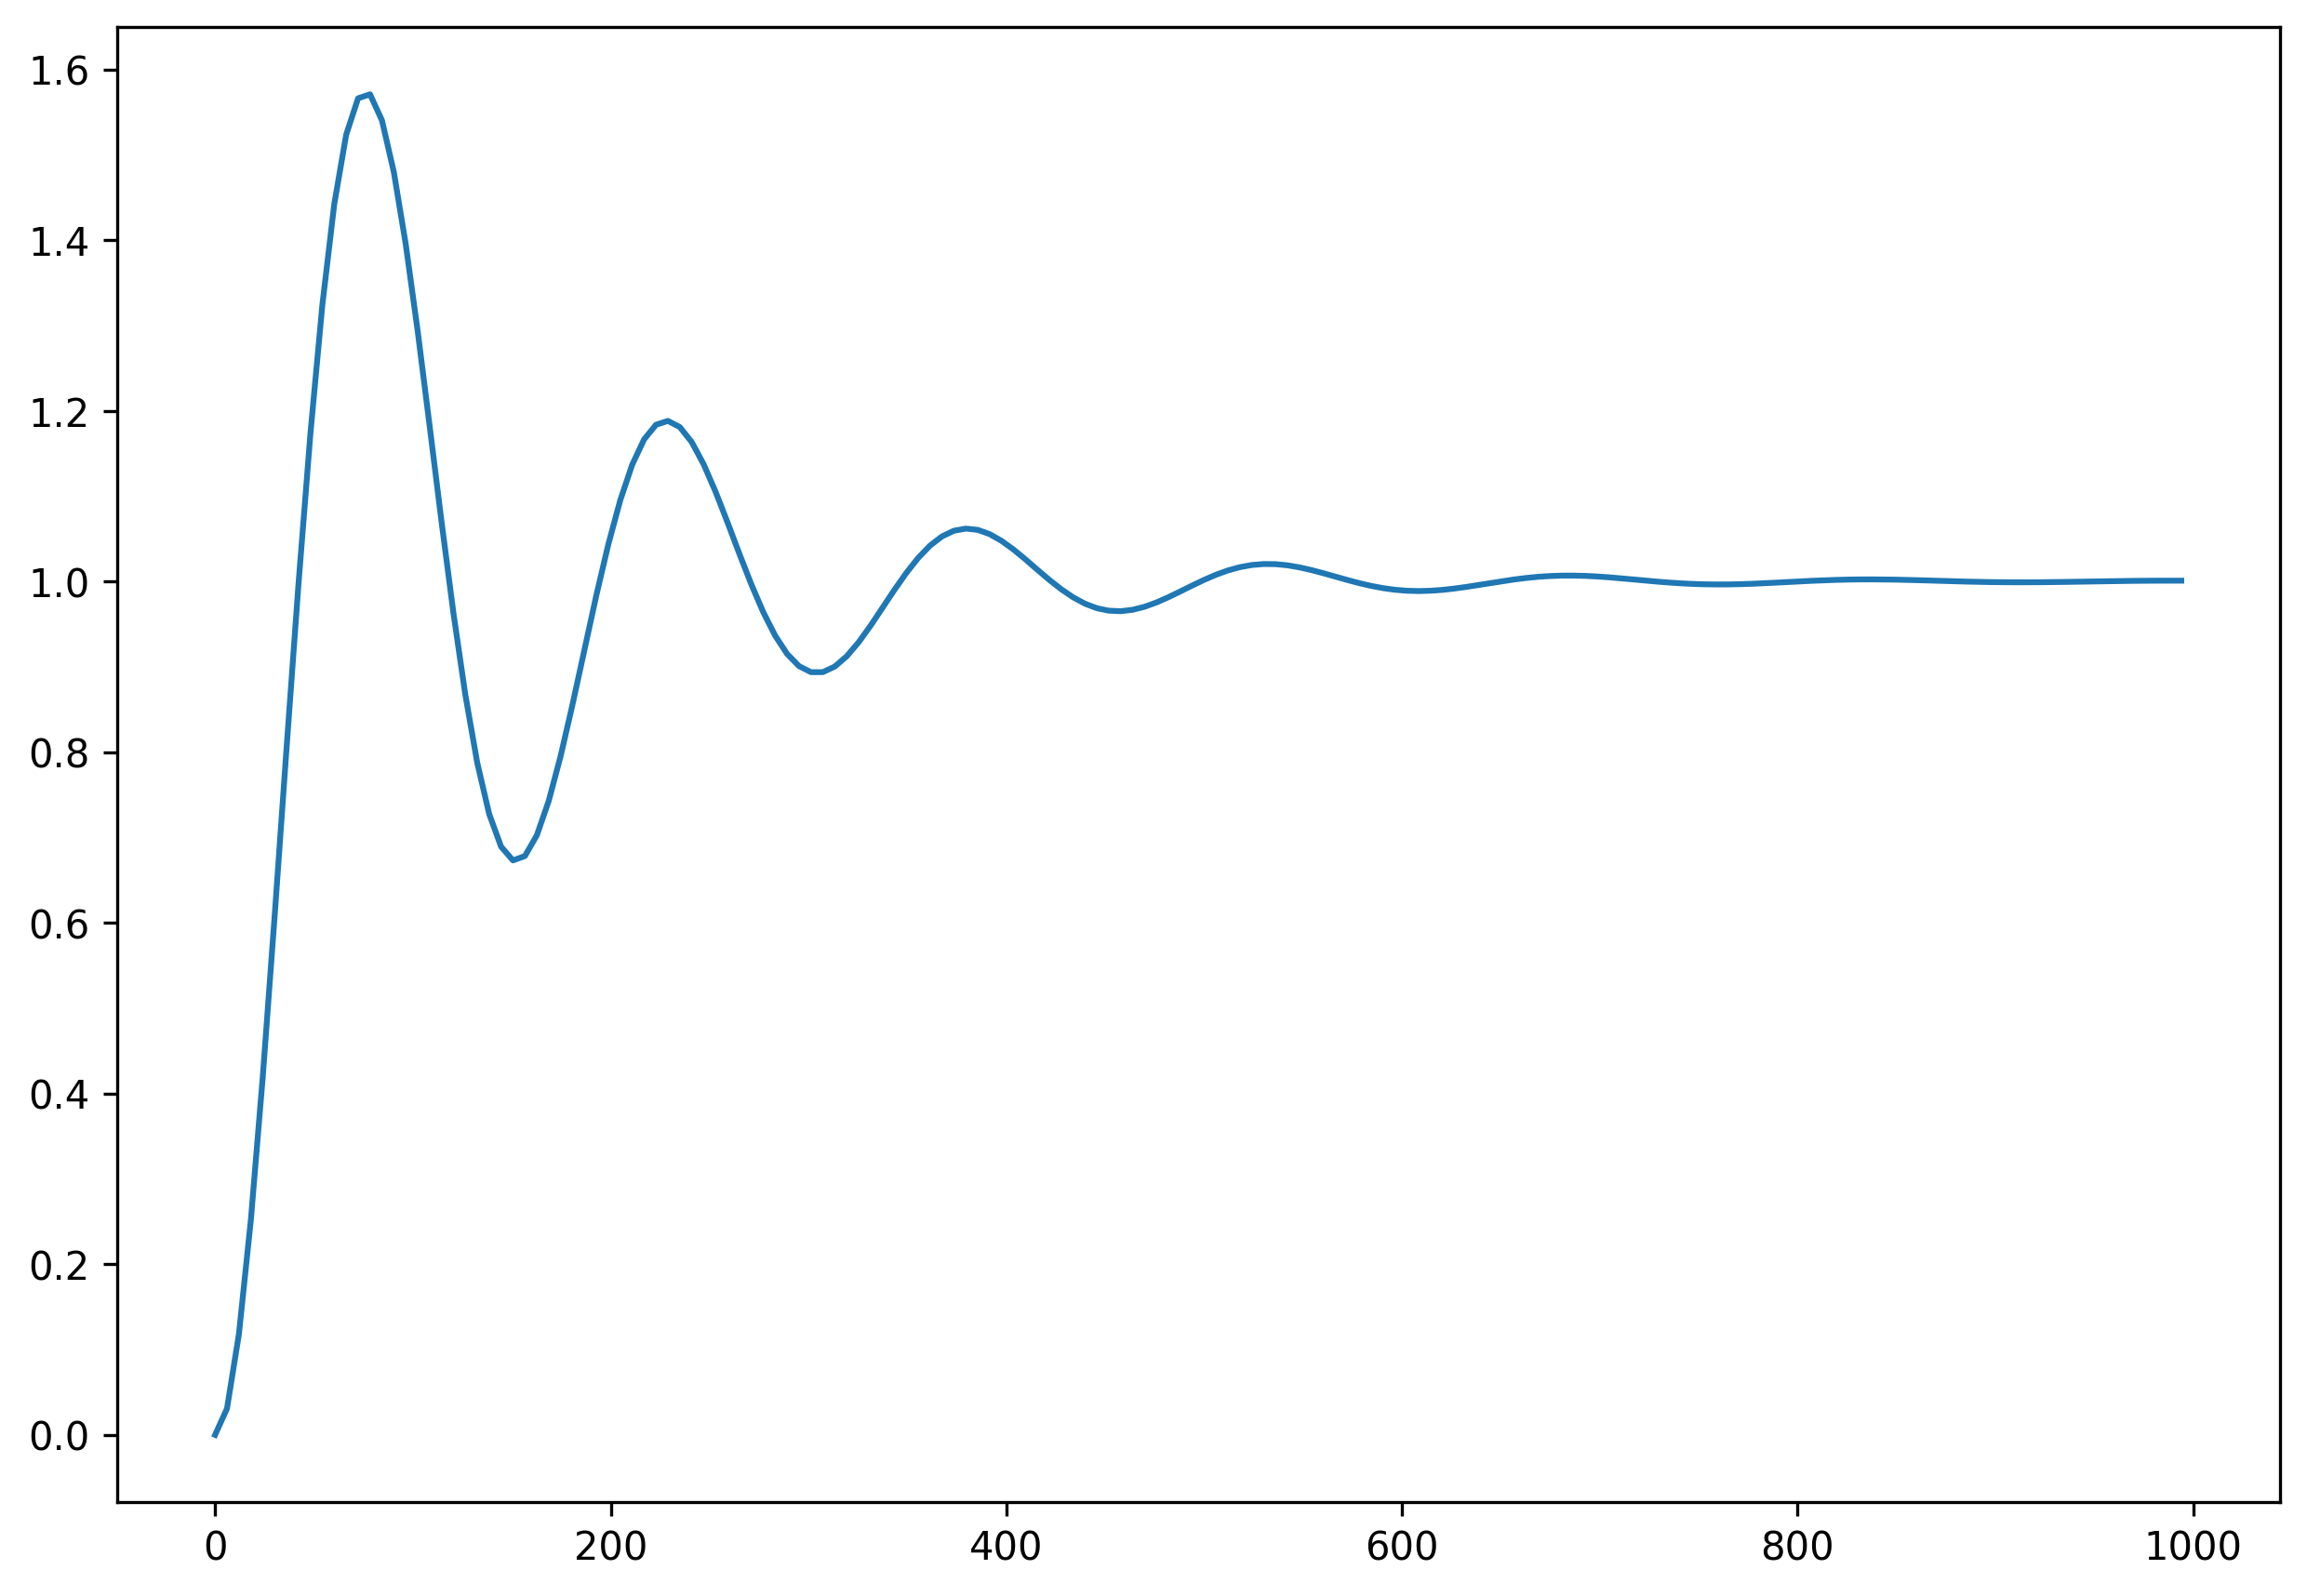

In [8]:
fig = plt.figure(num=None, figsize=(10,7), dpi=300, facecolor='w', edgecolor='k')
ty, tx = step(res['funcao'], T=1000)
pi = res['funcao']
plt.plot(tx,ty)
plt.show()
plt.close()

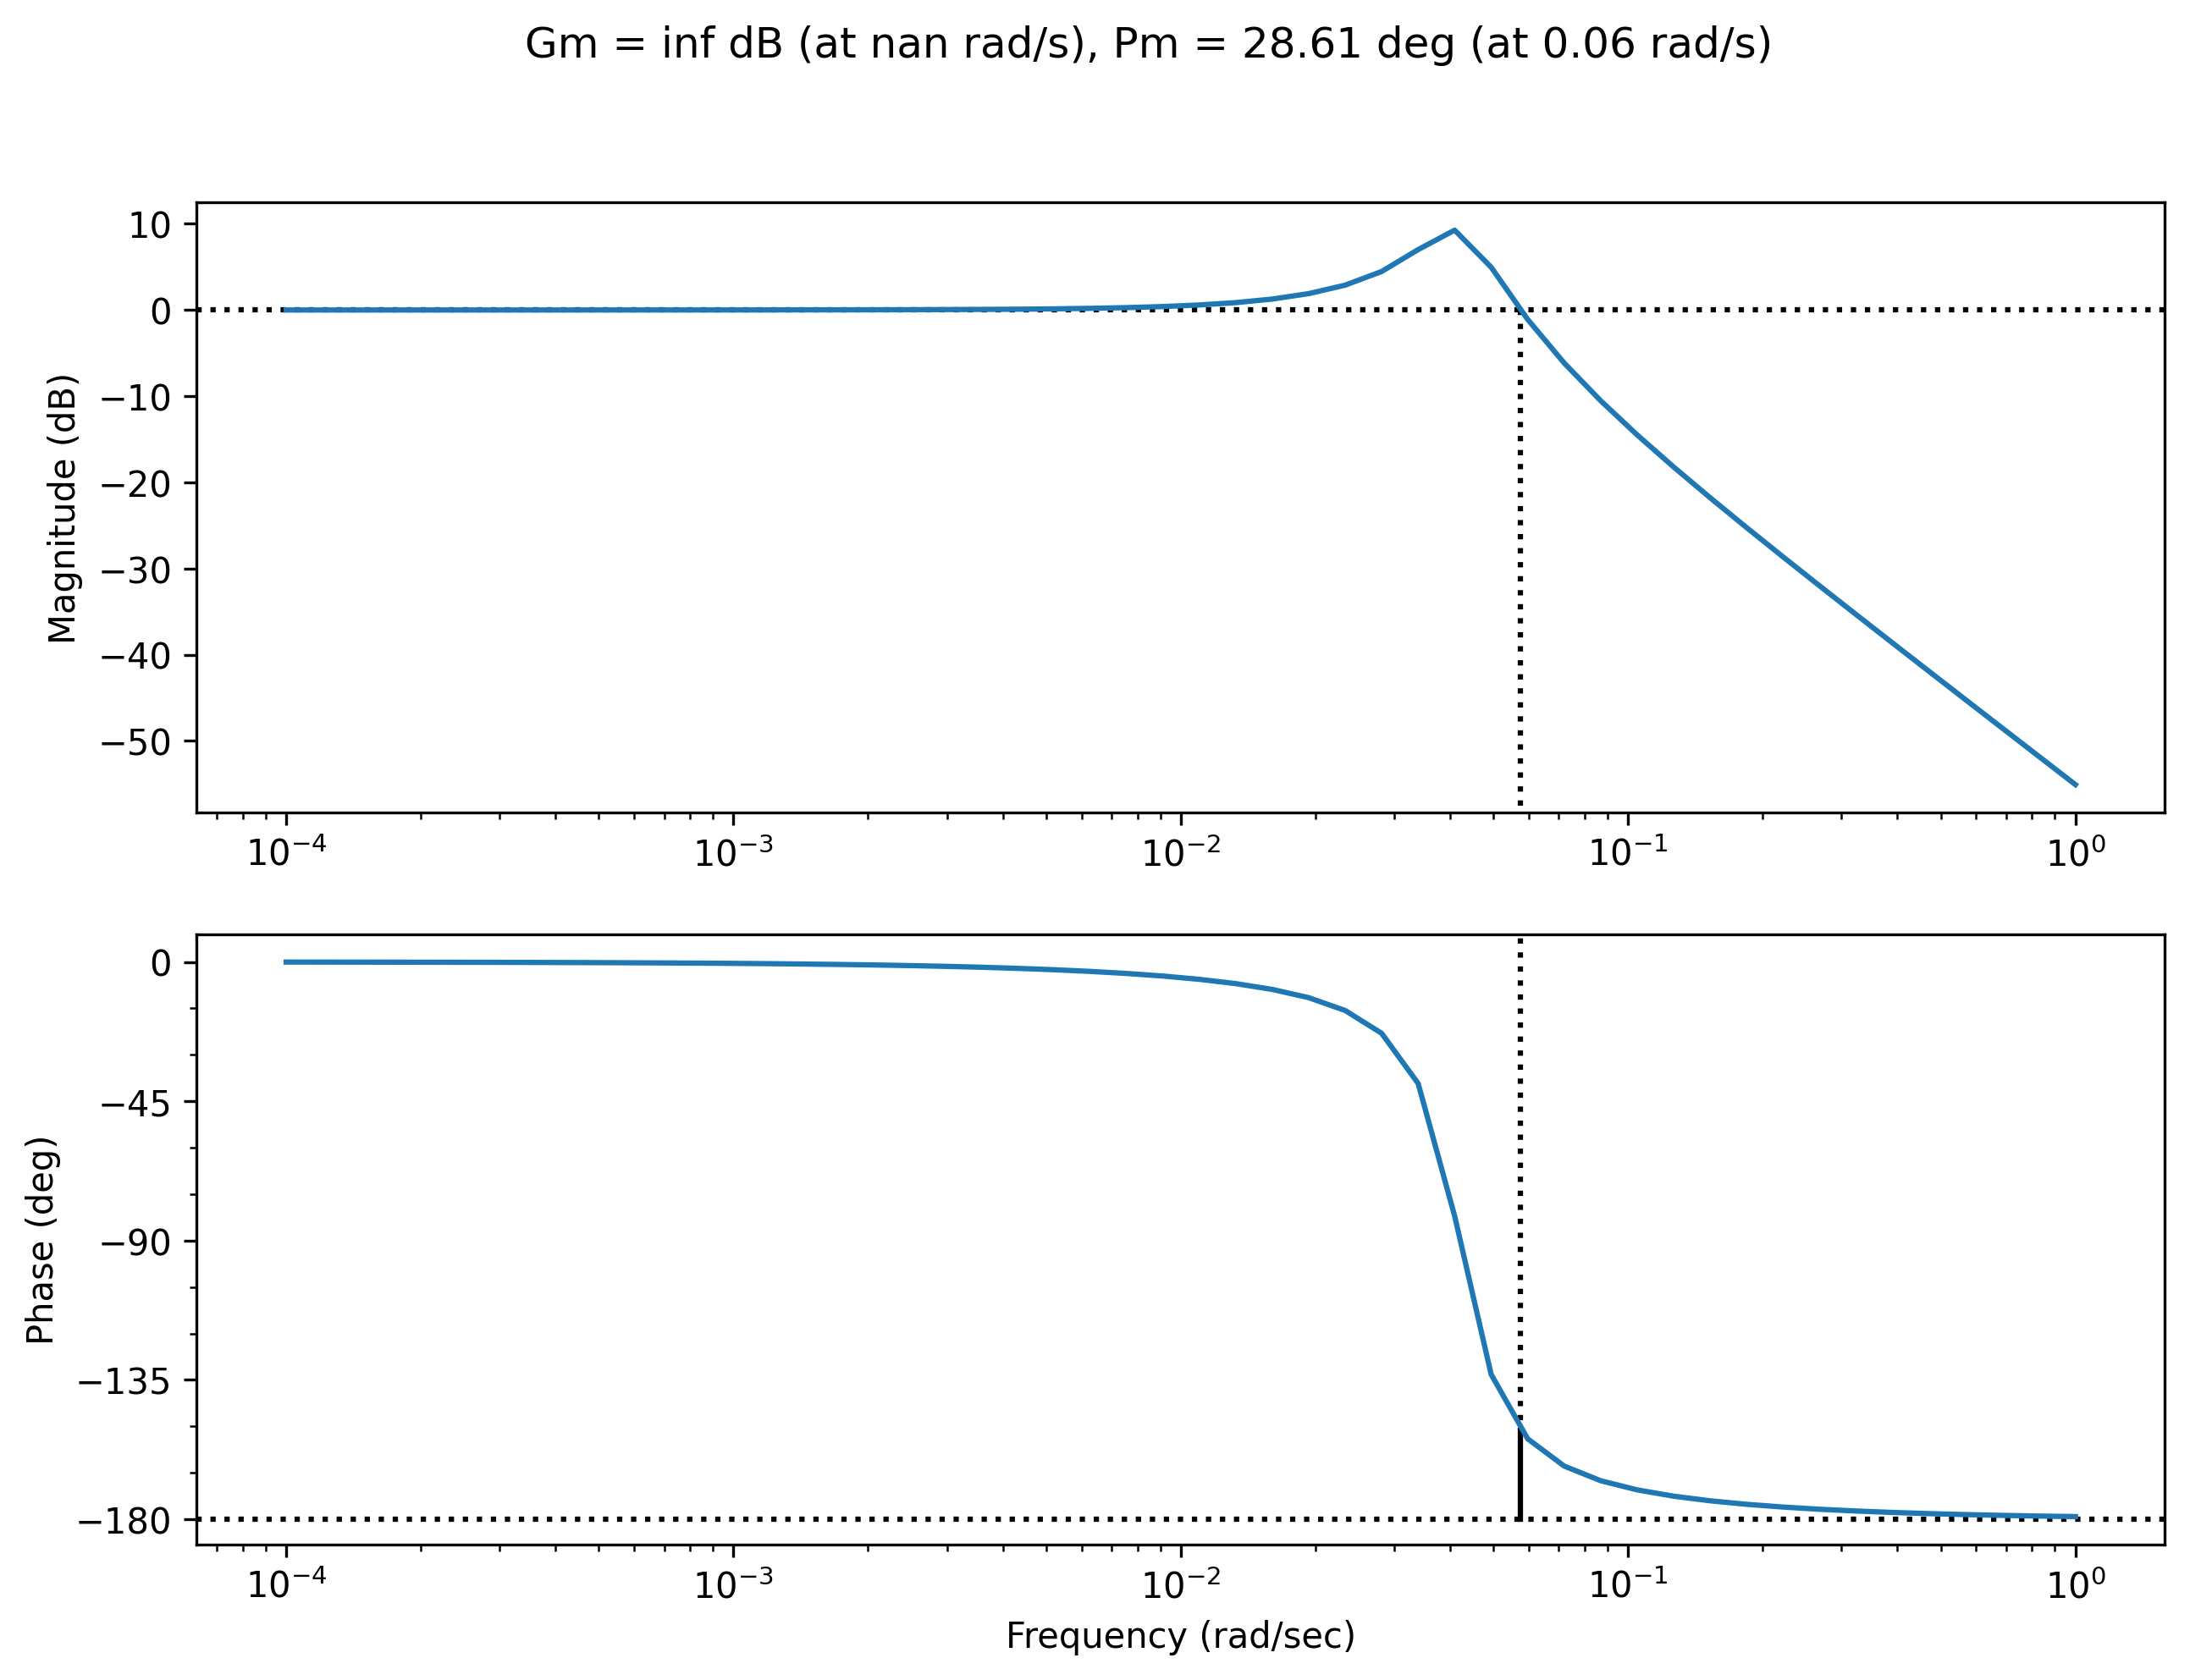

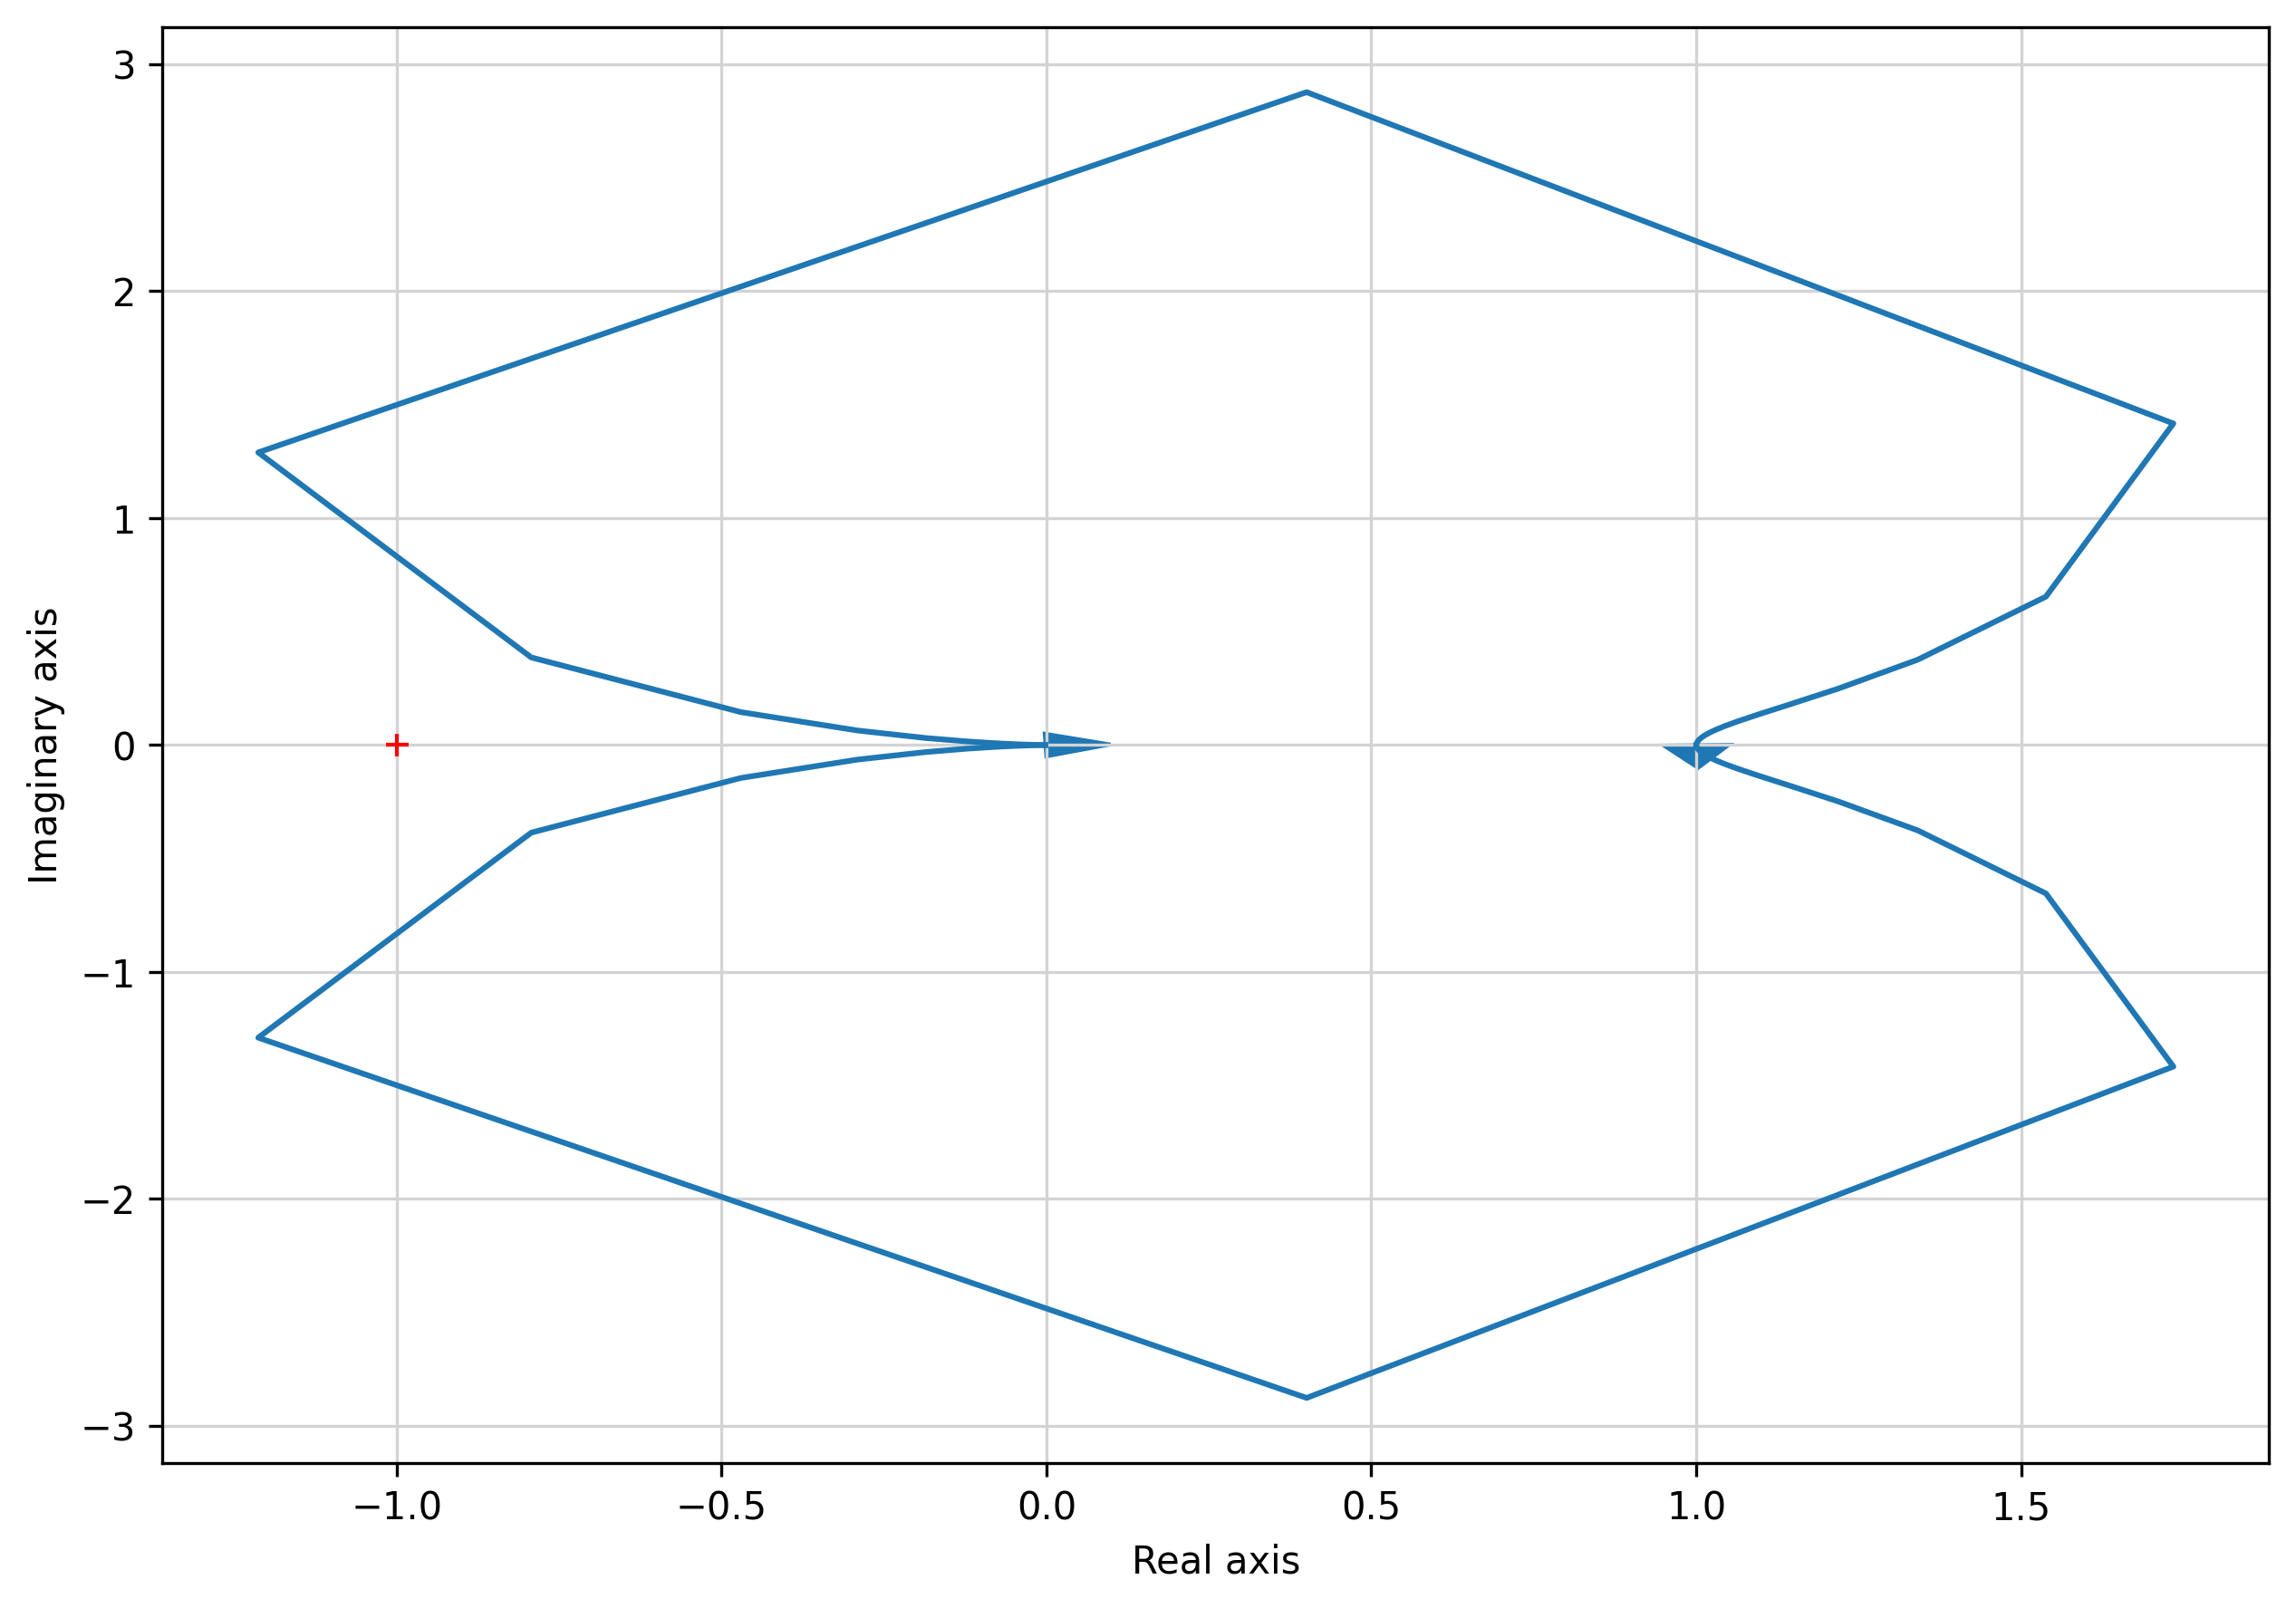

In [9]:
fig = plt.figure(num=None, figsize=(10,7), dpi=300, facecolor='w', edgecolor='k')
bode(res['funcao'], margins=True, figure = fig)
plt.show()
plt.close()
fig = plt.figure(num=None, figsize=(10,7), dpi=300, facecolor='w', edgecolor='k')
nyquist(res['funcao'], figure = fig)
plt.show()
plt.close()

## Projeto do Compensador

$$\large G(s) = \frac{25.548}{(s + 0.01473)(s+0.000094)}$$

$$\large G_c(s) = K_c\frac{(s+d)}{(s+e)}$$

$$\large \zeta=0.5, \omega_n = 3 rad/s$$

$$\large P = -0.0078 \pm j0.01746$$

$$\large \zeta\omega_{n} = 0.5\times3 = 1.5$$

$$\large \theta =  arccos \left(\frac{1.5}{3}\right) = 60º$$

$$\large \omega_{d} = 3 \times sen(60º) = 2.5981$$

$$\large P = -1.5 \pm j2.5981$$

$$\large \theta_1 = 180º - arctan \left(\frac{2.5981}{1.5-0.00094}\right) = 119.98º $$

$$\large \theta_2 = 180º - arctan \left(\frac{2.5981}{1.5-0.01473}\right) = 119.76º $$

$$\large 119.98º + 119.76º + \phi = 180º $$

$$\large \phi = -59.74º $$

$$\large \theta_{z} = arctan \left(\frac{2.5981}{1.5-0.01473}\right) = 60.24º $$

$$\large \theta_{p} = 180º - 60.24º - 59.74º = 60.02º $$

$$\large tg(60.02º) \left( \frac{2.5981}{E-1.5} \right)$$

$$\large E = 3$$

$$ \large \left| K_c \frac{(s + 0.01473)}{(s+3)} \frac{25.548}{(s + 0.01473)(s + 0.00094)} \right| = 1$$

$$ \large K_c =  \left| \frac{25.548}{(s+3)(s + 0.00094)} \right|$$

$$ \large K_c =  \left| -2.83907-j0.000770513 \right| = 2.839$$

$$\large \frac{72.5308}{(s+3)(s+0.00282)}$$

Malha aberta:


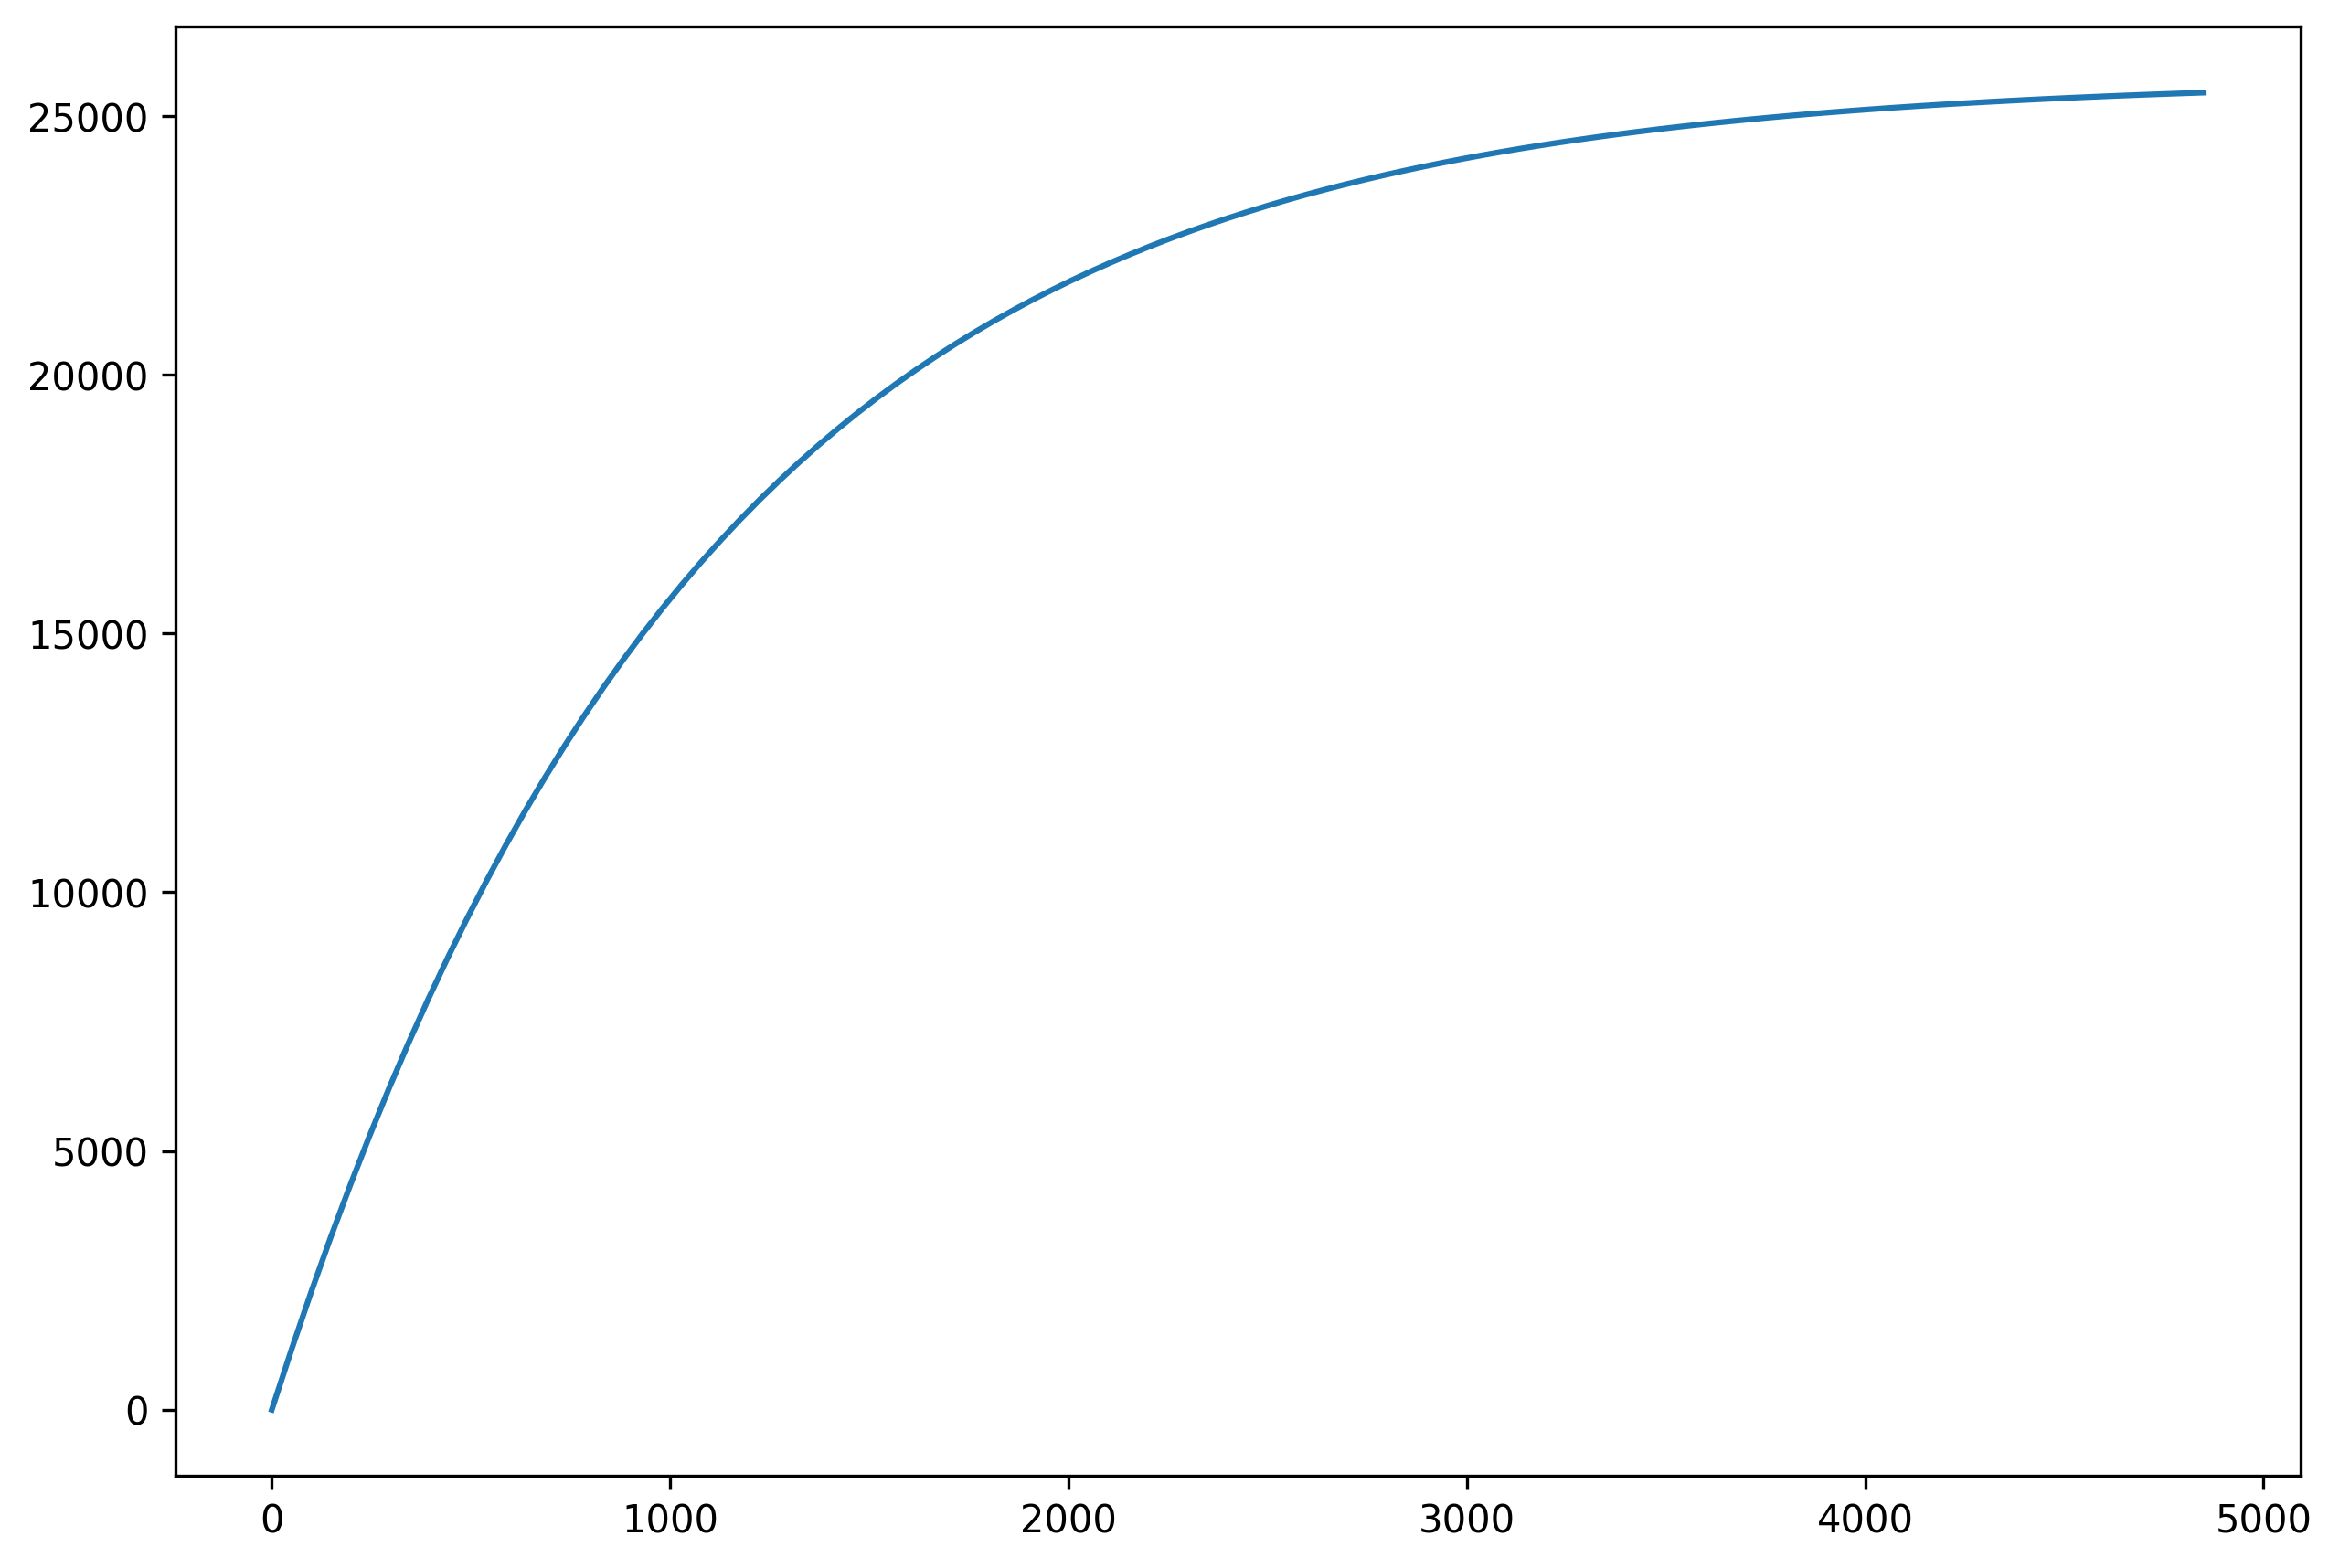

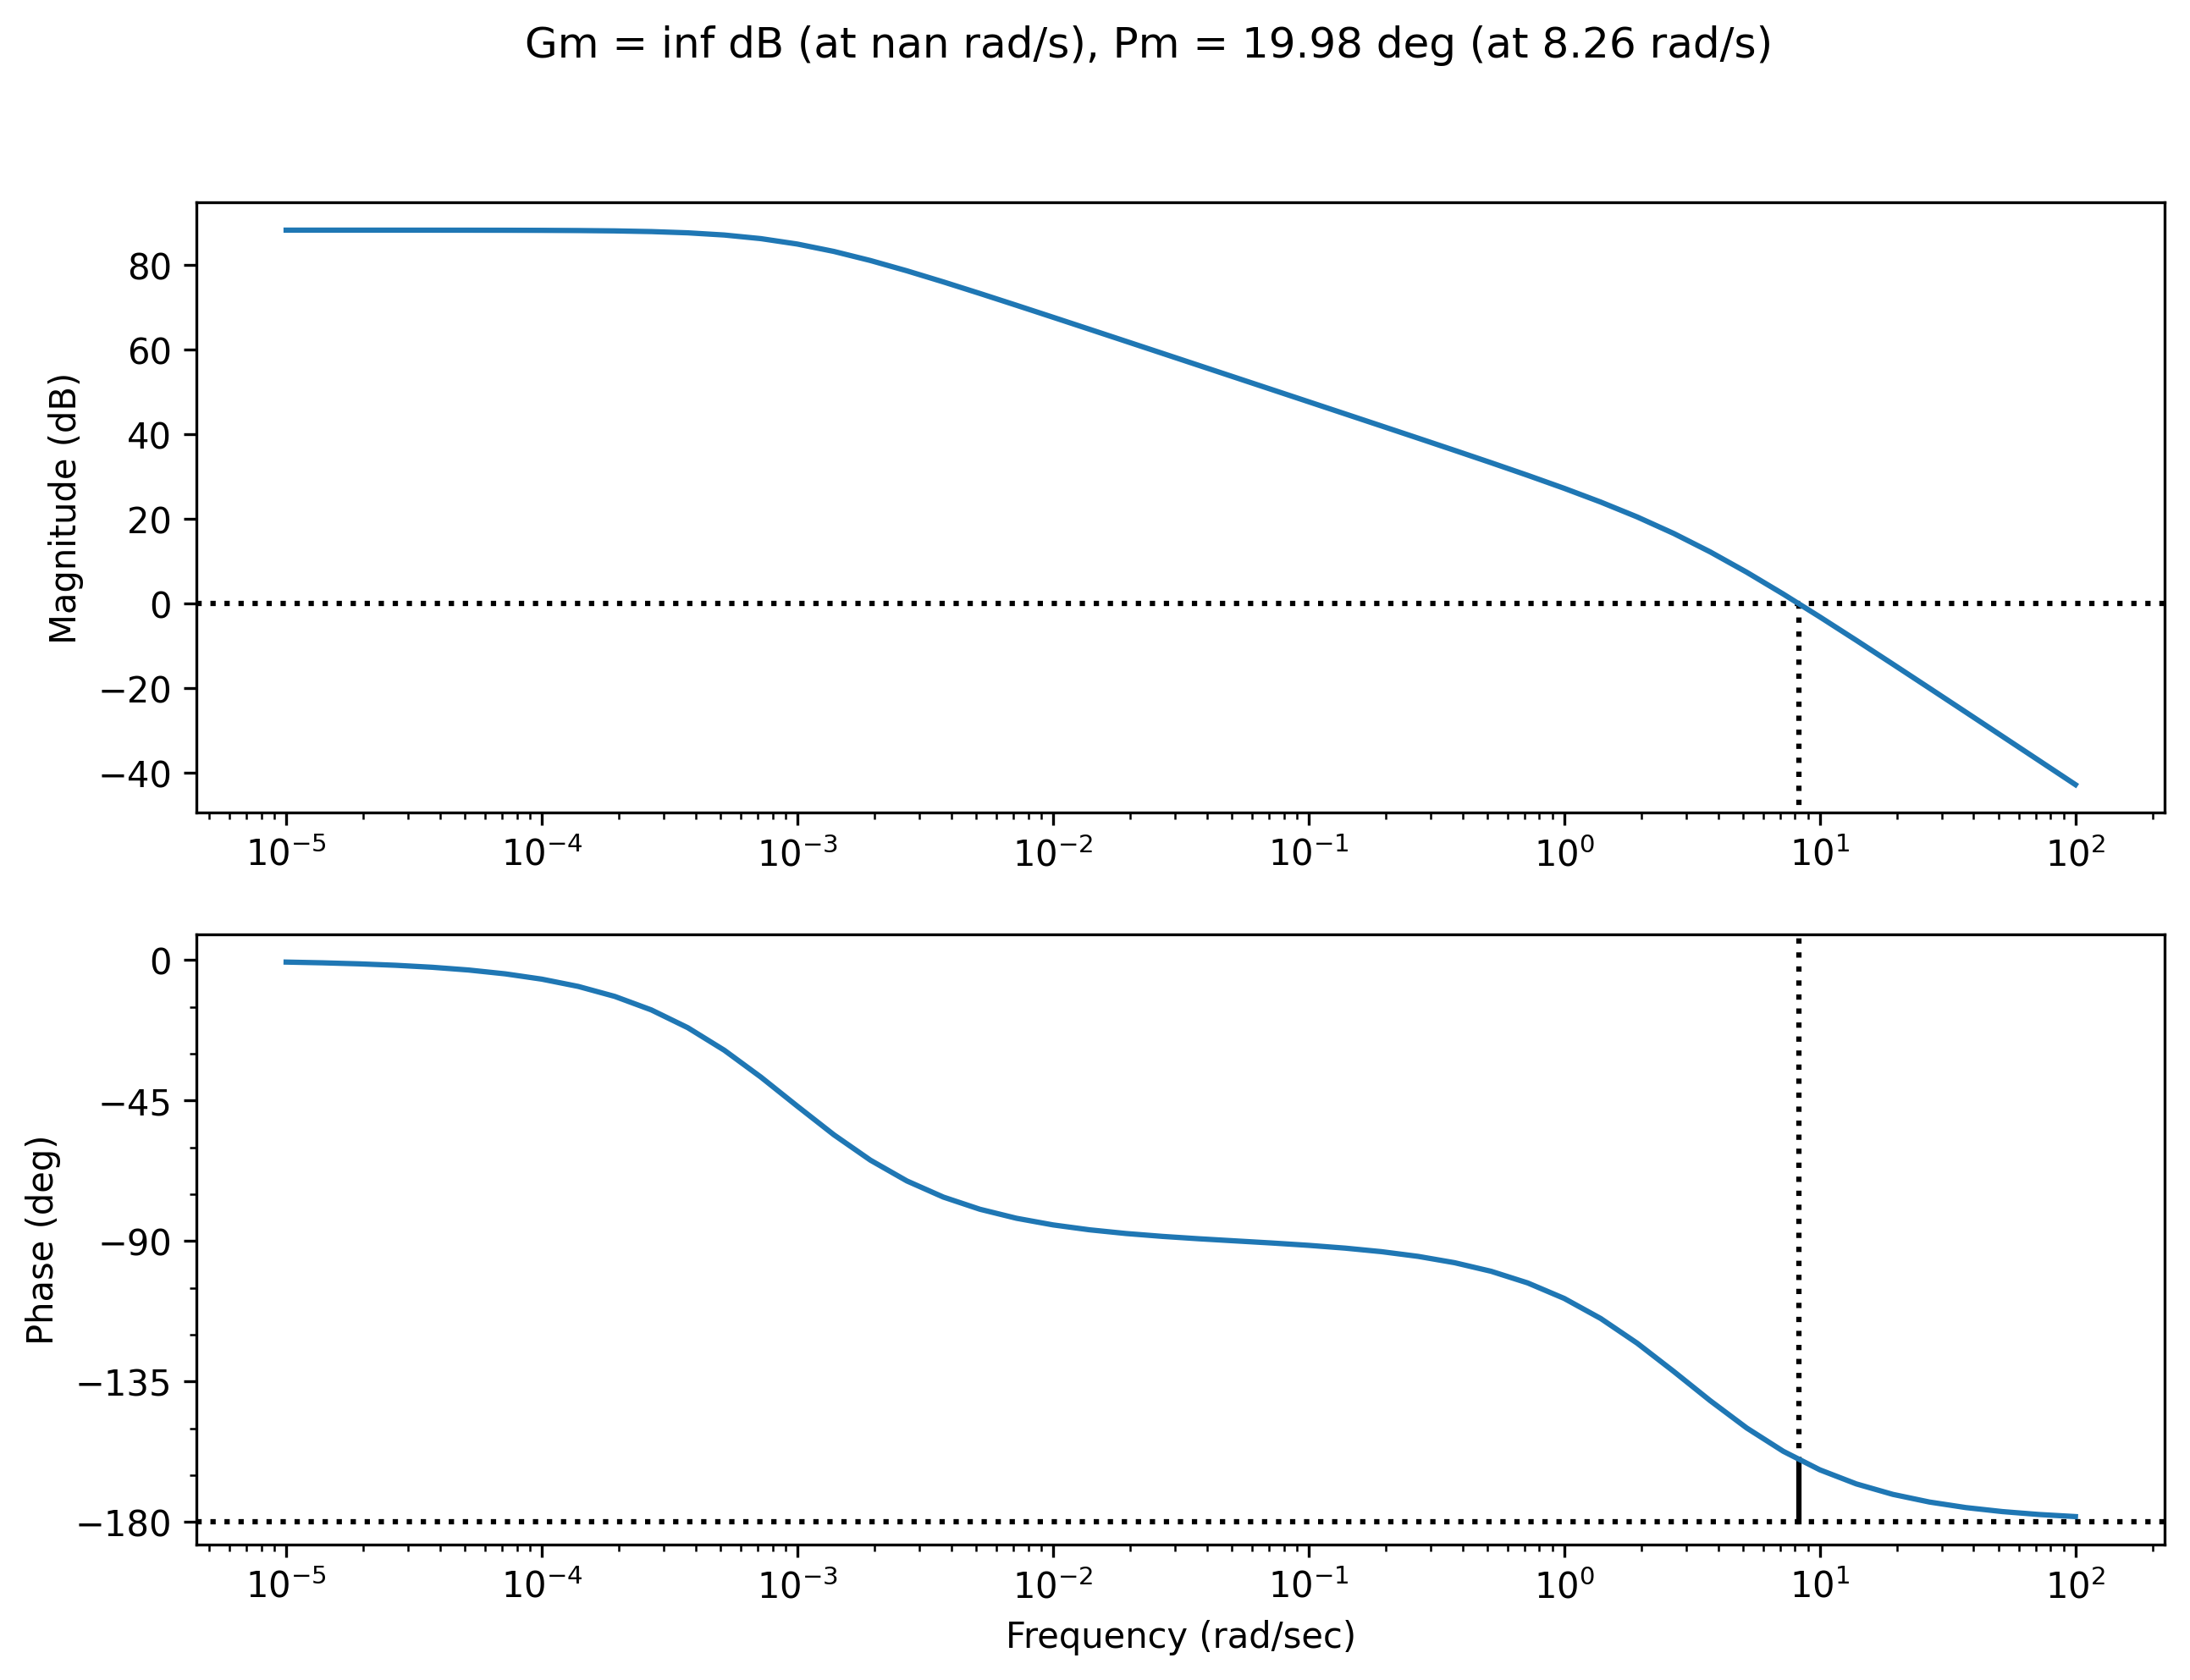

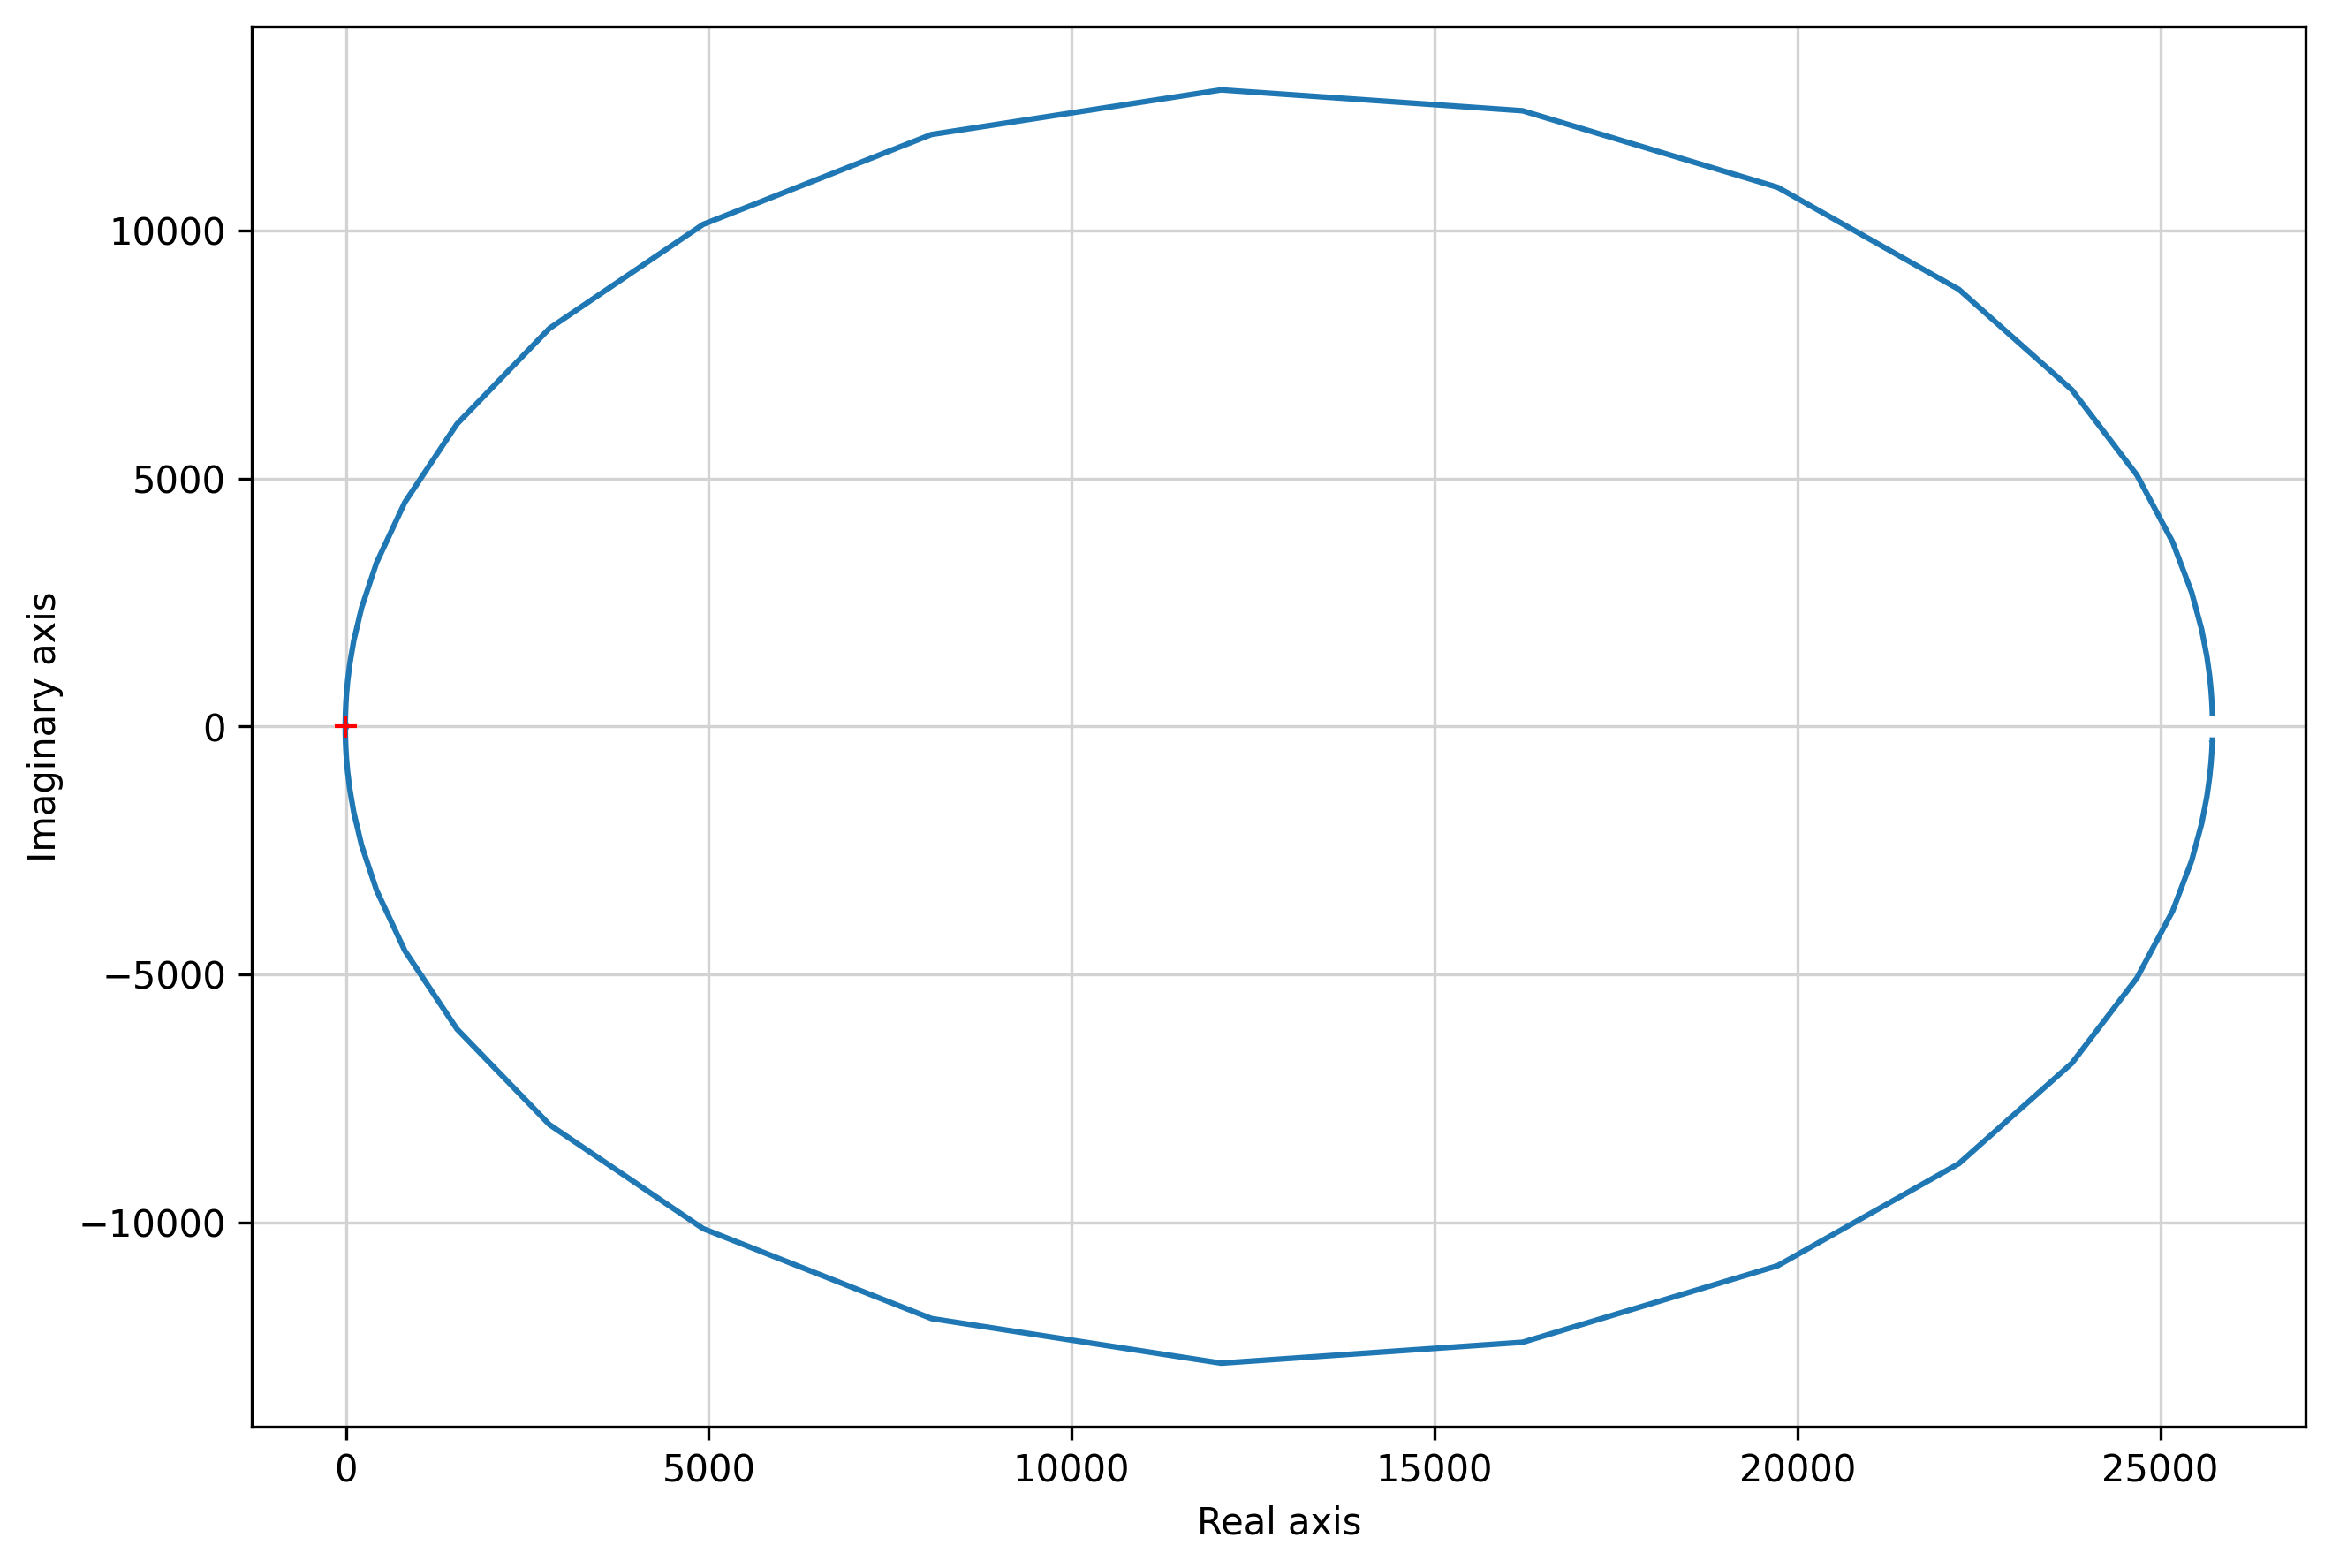

Malha fechada:


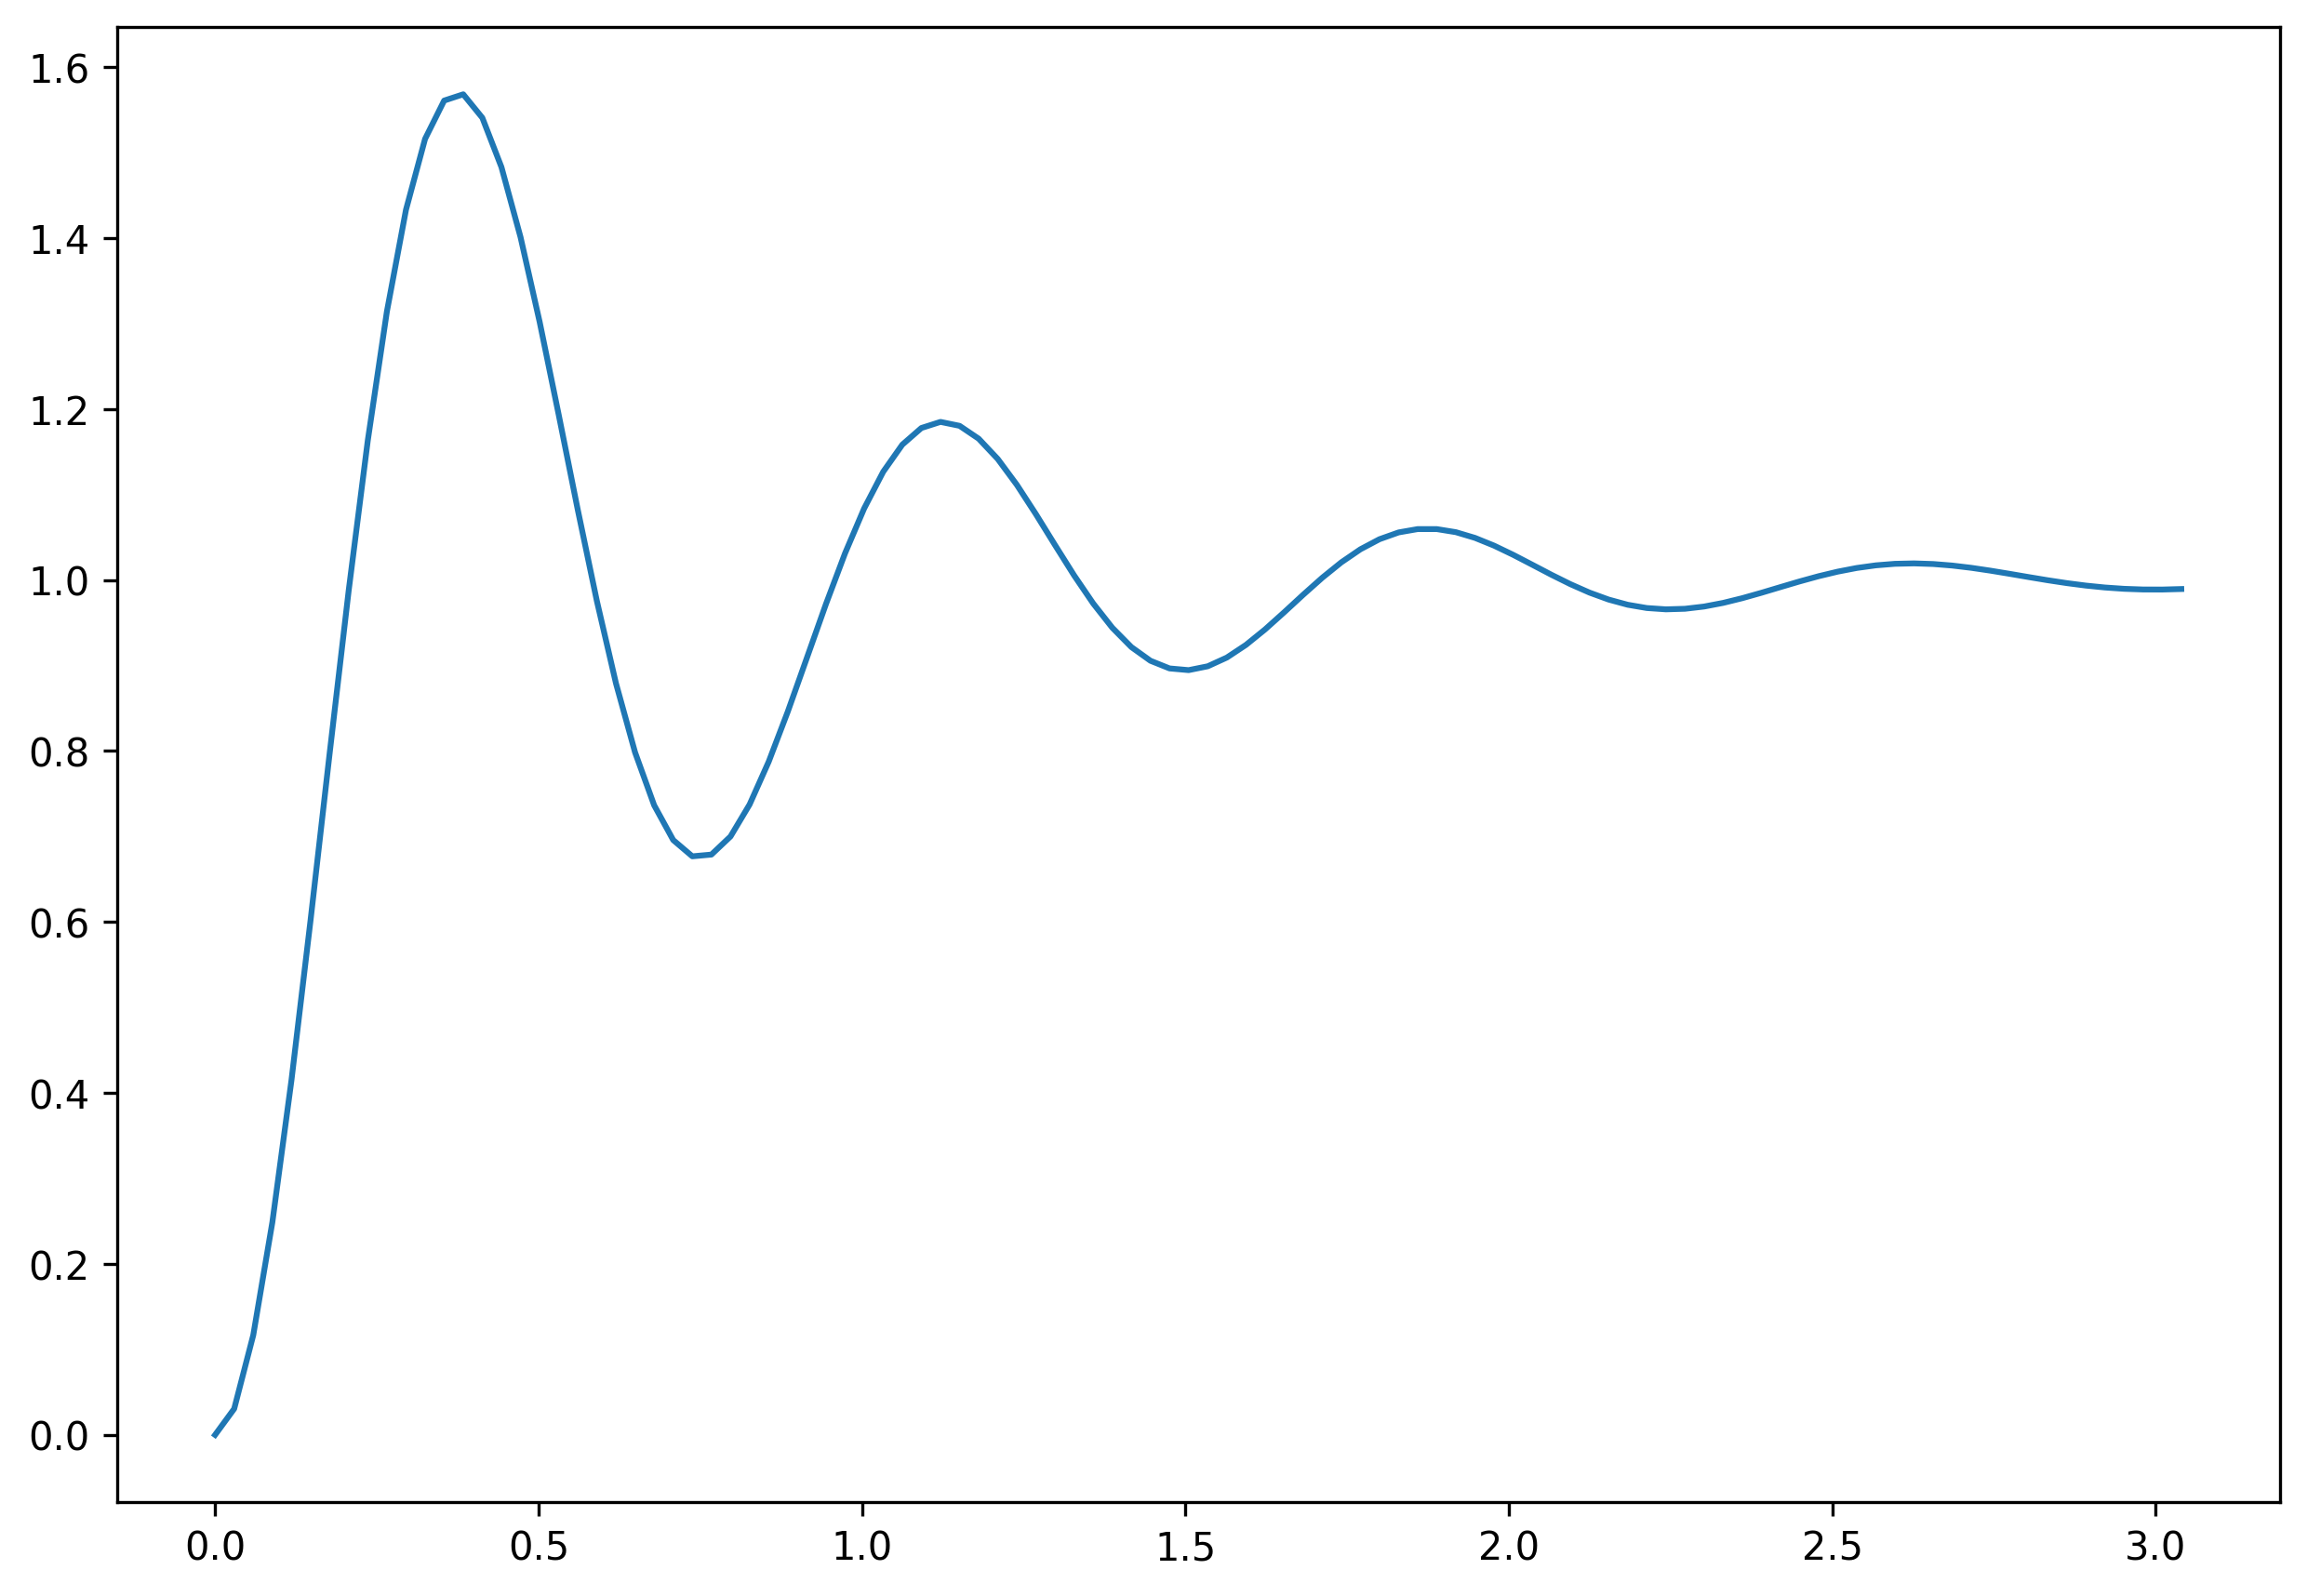

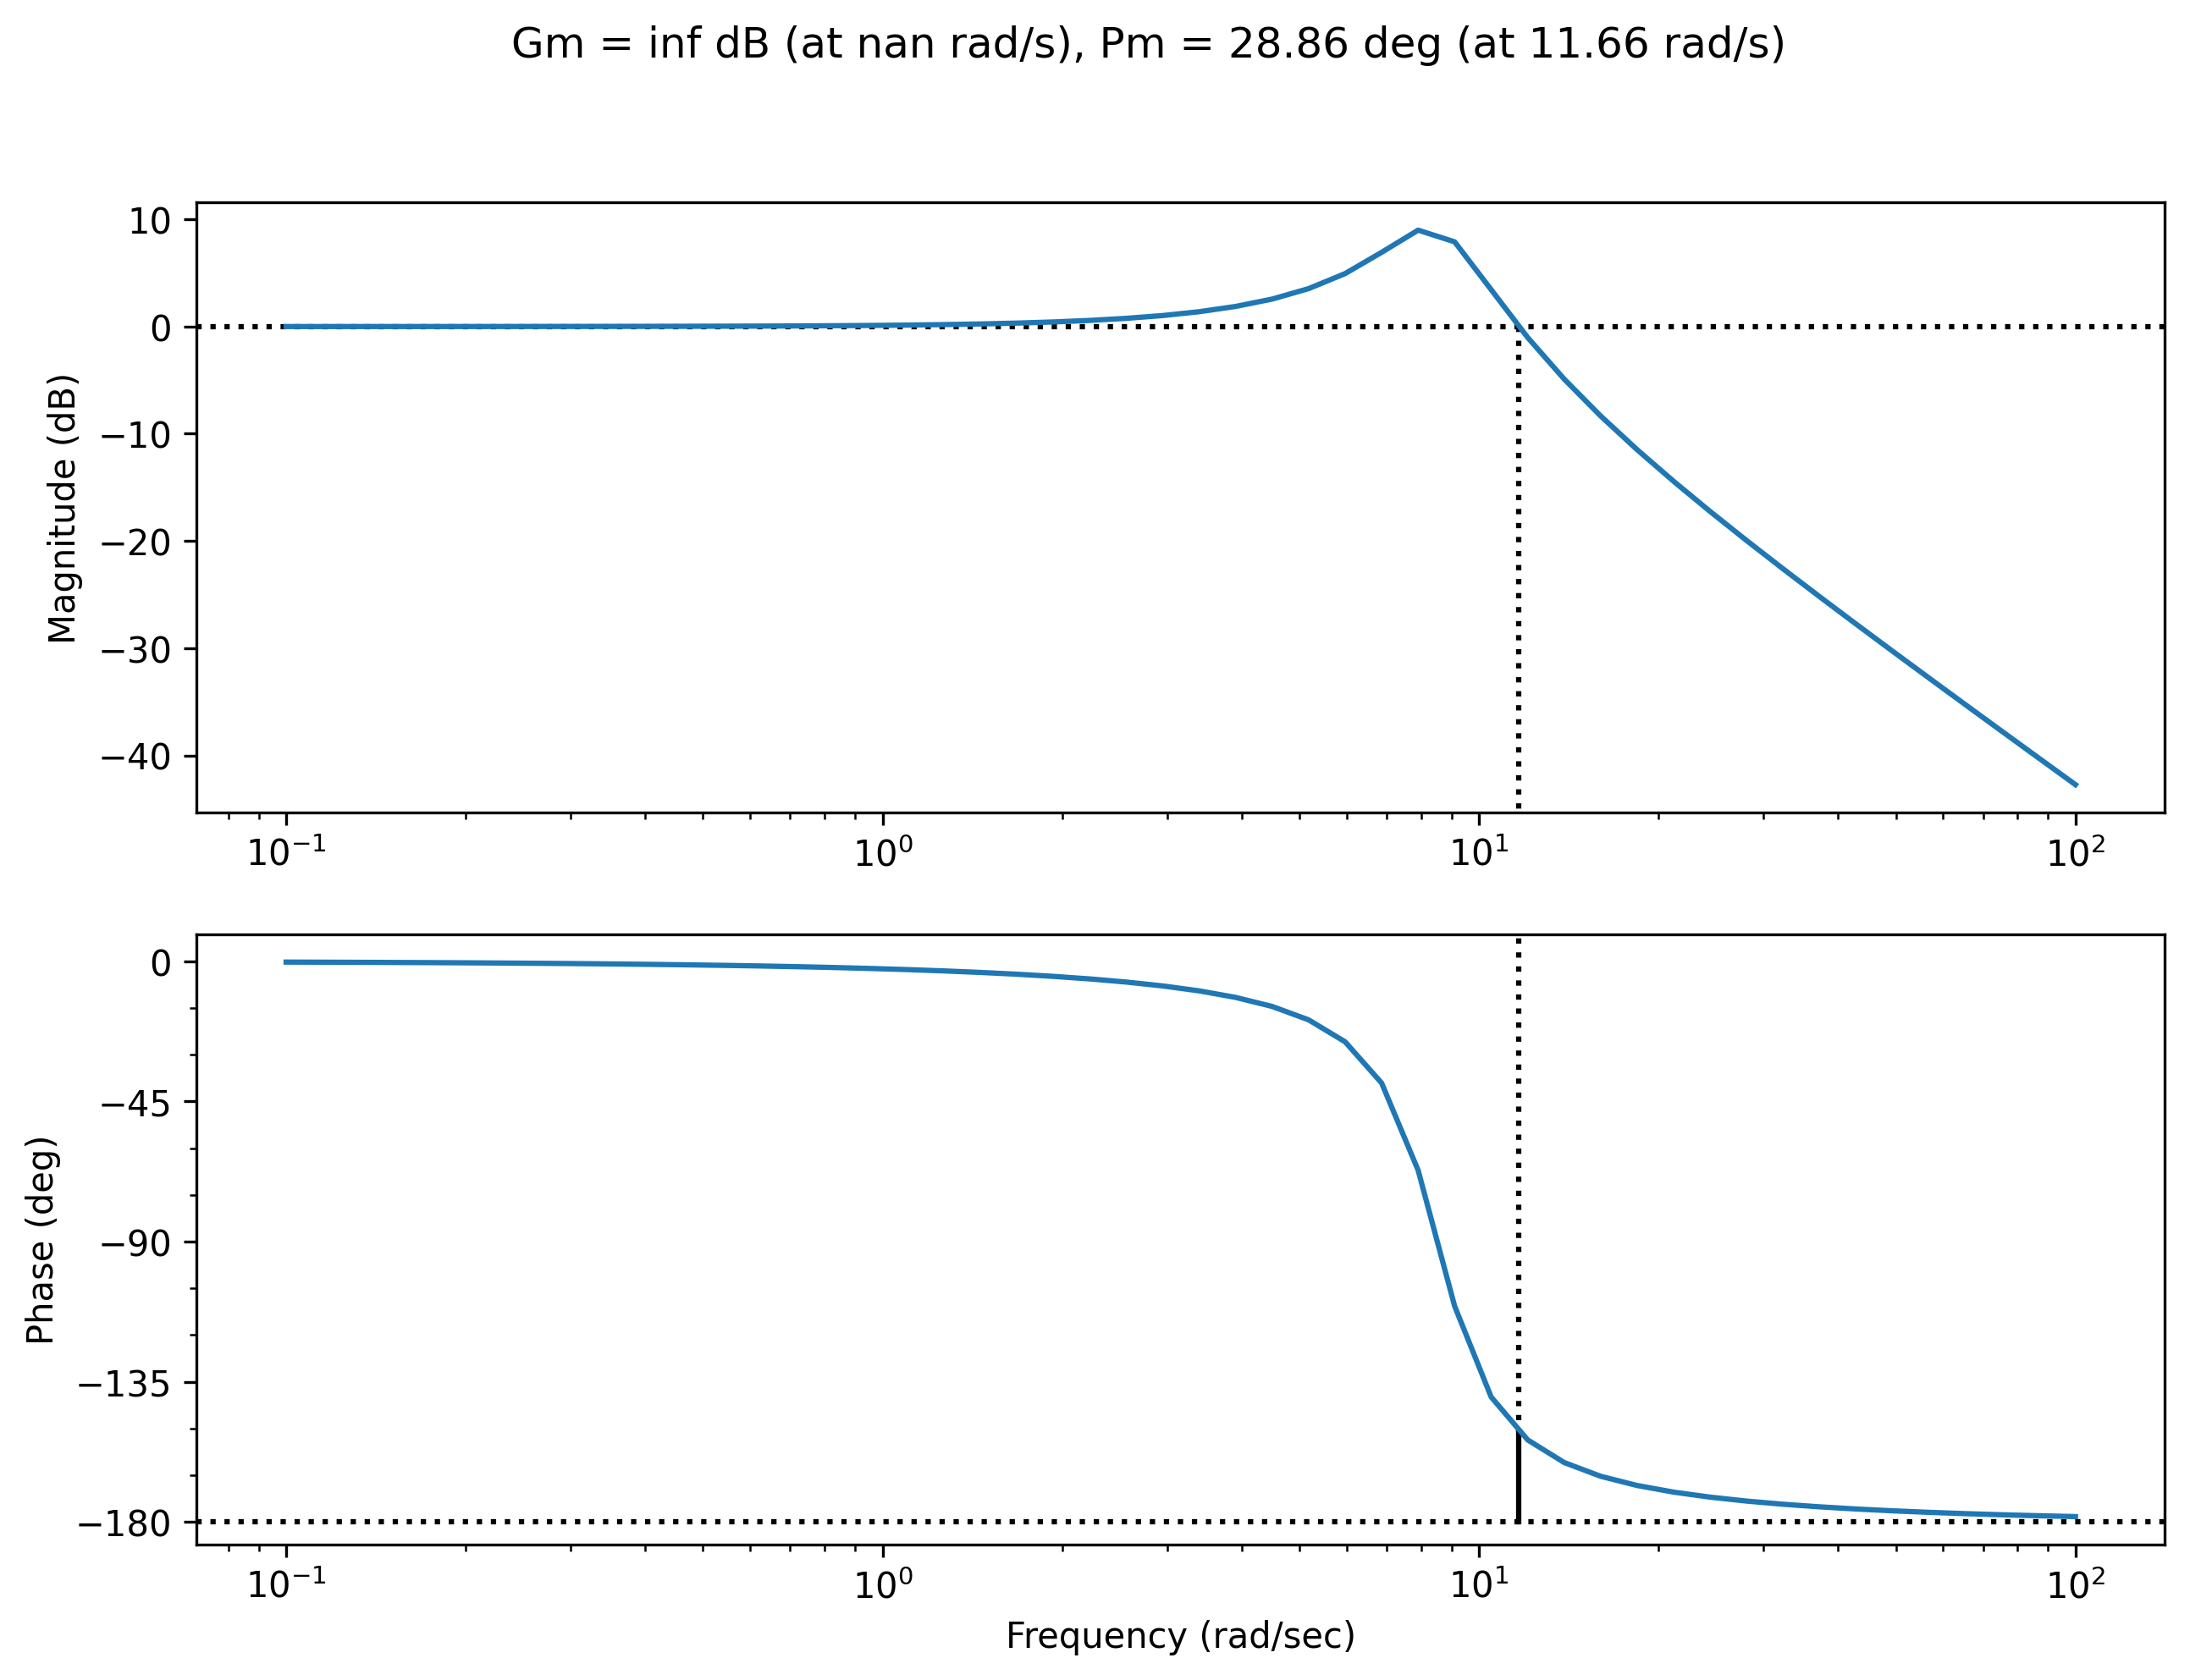

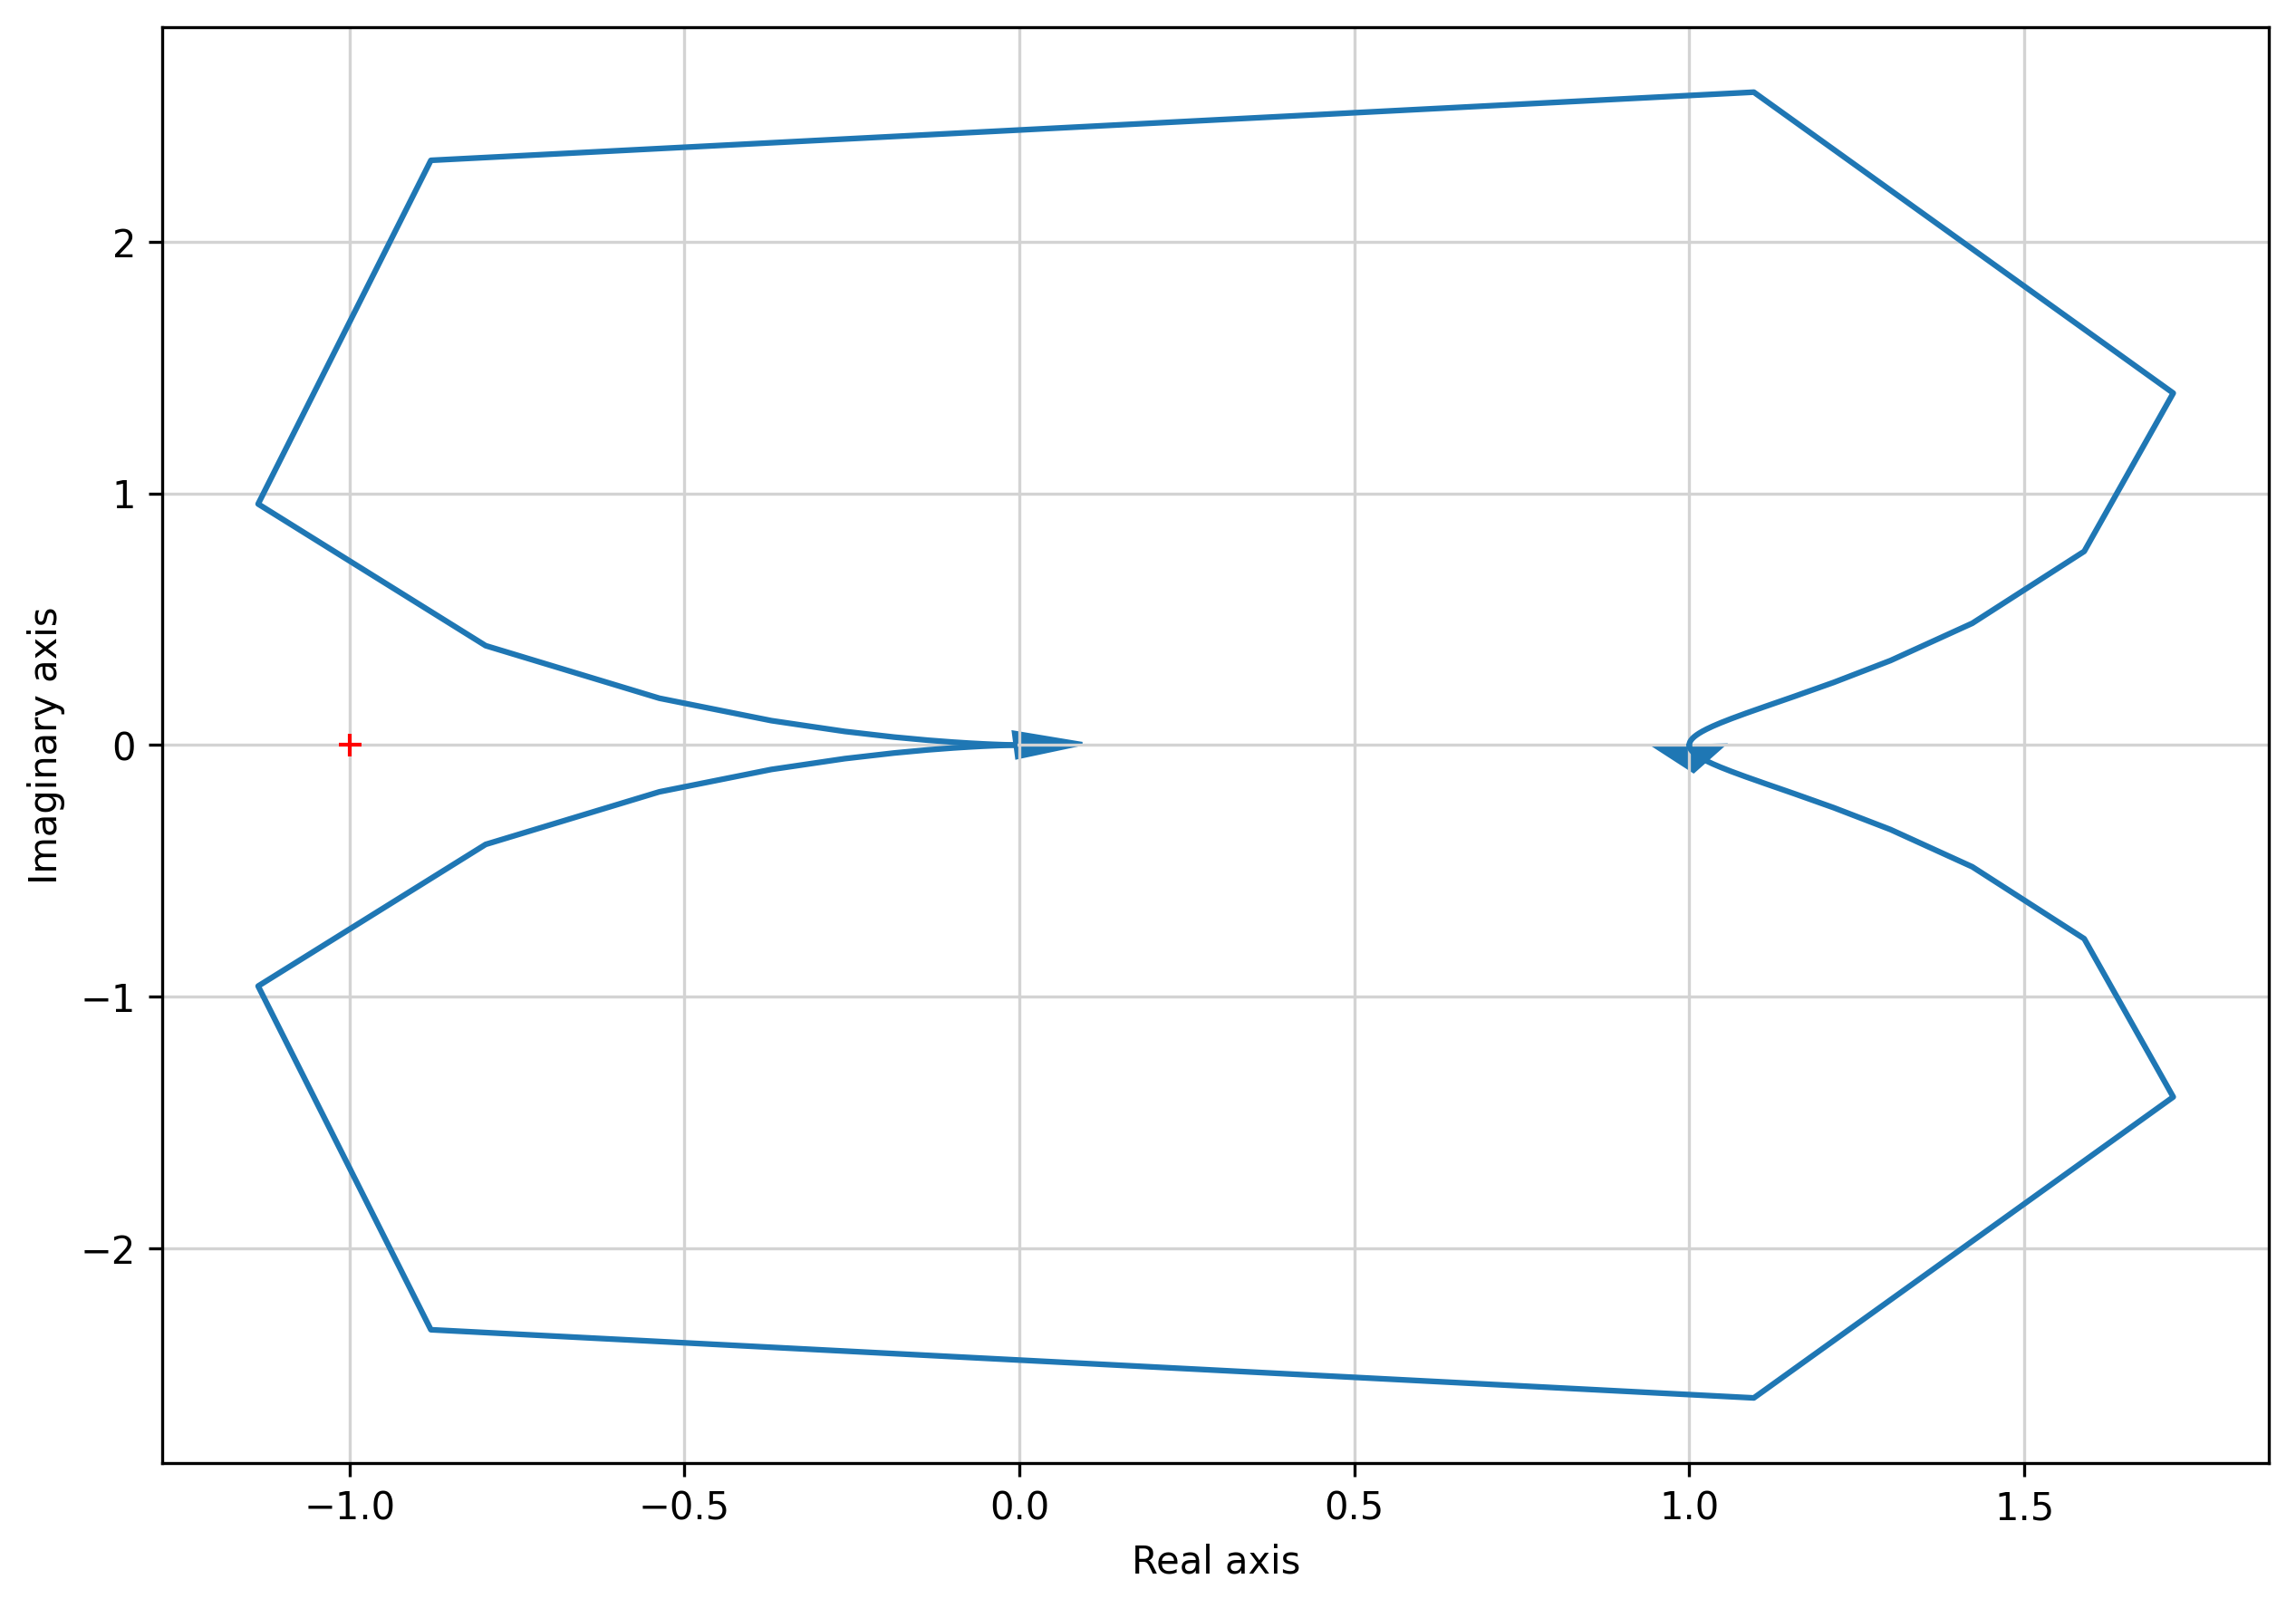

{'RiseTime': 0.14755537450791353,
 'SettlingTime': 2.7740410407487746,
 'SettlingMin': 0.67680952248968,
 'SettlingMax': 1.5682215952386518,
 'Overshoot': 58.486127066231155,
 'Undershoot': 0.0,
 'Peak': 1.5682215952386518,
 'PeakTime': 0.38364397372057524,
 'SteadyStateValue': 0.9895008631154788}

In [10]:
funcao_compensador = tf([72.5308],[1,3.00094,0.00282])
fig = plt.figure(num=None, figsize=(10,7), dpi=300, facecolor='w', edgecolor='k')
print("Malha aberta:")
ty,tx = step(funcao_compensador)
plt.plot(tx,ty)
plt.show()
bode(funcao_compensador, margins = True, figure = plt.figure(num=None, figsize=(10,7), dpi=300, facecolor='w', edgecolor='k'))
plt.show()
nyquist(funcao_compensador, figure = plt.figure(num=None, figsize=(10,7), dpi=300, facecolor='w', edgecolor='k') )
plt.show()

fig = plt.figure(num=None, figsize=(10,7), dpi=300, facecolor='w', edgecolor='k')
compensador_malha_fechada = feedback(funcao_compensador)
print("Malha fechada:")
ty,tx = step(compensador_malha_fechada)
plt.plot(tx,ty)
plt.show()
bode(compensador_malha_fechada, margins = True, figure = plt.figure(num=None, figsize=(10,7), dpi=300, facecolor='w', edgecolor='k'))
plt.show()
nyquist(compensador_malha_fechada, figure = plt.figure(num=None, figsize=(10,7), dpi=300, facecolor='w', edgecolor='k') )
plt.show()
stepinfo(compensador_malha_fechada)